In [71]:
___Author___='LumberJack Jyss'

In [72]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


In [73]:
print('Importing librairies...')
import datetime as dt
import numpy as np
import pandas as pd
import talib
from zigzag import *
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.dates as mdates
import datetime as dt
import pickle
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,roc_curve,confusion_matrix,classification_report
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.utils import to_categorical
%matplotlib inline
print('Librairies imported')

Importing librairies...
Librairies imported


In [74]:
import warnings
import tensorflow as tf
warnings.filterwarnings("ignore")
tf.logging.set_verbosity(tf.logging.ERROR)

In [75]:
import fxcmpy
import time
TOKEN = 'e053ac1597cef331df9429ac8151100ea9f1c411'
server = 'demo'
period = 'm5'
number = 10000
start = dt.datetime(2017, 7, 15)
stop = dt.datetime(2019, 6, 12)

tmps1=time.time()
print('Connecting server...')
con = fxcmpy.fxcmpy(access_token=TOKEN, log_level='error',server= server)
if con.is_connected():
    print('Connection established for',con.get_account_ids(),' - Mode :',server)
else:
    print('Not connected')
    
df = con.get_candles('GER30', period=period,number=number) #start=start,stop=stop)
data = pd.DataFrame()
data['Open'] = df['askopen']
data['High'] = df['askhigh']
data['Low'] = df['asklow']
data['Close'] = df['askclose']
data['Date'] = df.index
data = data[['Date'] + data.columns[:-1].tolist()]
df = data.copy()

tmps2=round(time.time()-tmps1,2)
print ("executed in = %f" %tmps2,'secondes')

Connecting server...


W0722 12:00:21.161607 4517901760 fxcmpy.py:222] Default account set to 1147539, to change use set_default_account().


Connection established for [1147539]  - Mode : demo
executed in = 10.790000 secondes


In [76]:
df.reset_index(inplace=True,drop=True)

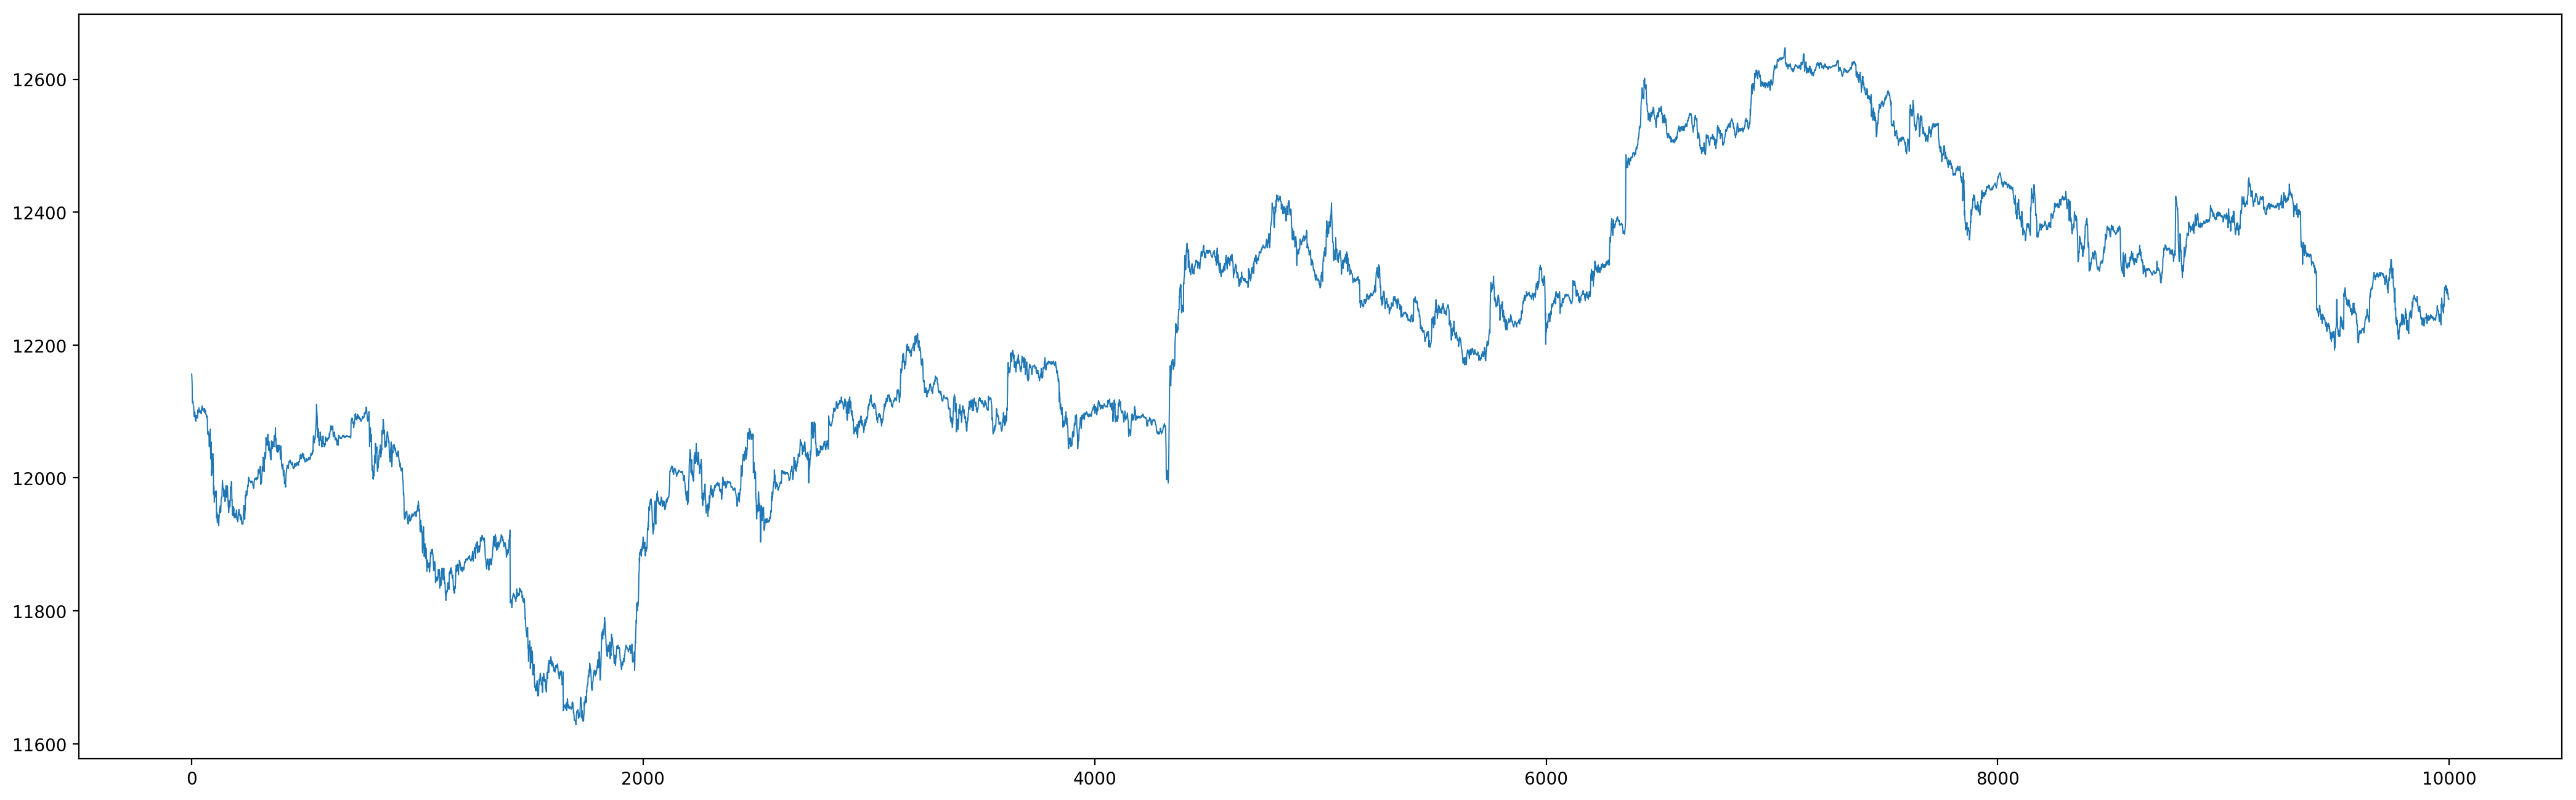

In [77]:
plt.figure(figsize=(26,8),dpi = 200)
plt.plot(df.iloc[:,-1],linewidth=0.7)

In [78]:
rsi = talib.RSI(df['Close'],timeperiod=2)
upper, middle, lower =  talib.BBANDS(df['Close'], timeperiod=9, nbdevup=2, nbdevdn=2,matype=0)
sma5 = talib.SMA(df['Close'],timeperiod=5)
sma8 = talib.SMA(df['Close'],timeperiod=8)
sma10 = talib.SMA(df['Close'],timeperiod=10)
sma12 = talib.SMA(df['Close'],timeperiod=12)
sma15 = talib.SMA(df['Close'],timeperiod=15)
sma30 = talib.SMA(df['Close'],timeperiod=30)
sma35 = talib.SMA(df['Close'],timeperiod=35)
sma40 = talib.SMA(df['Close'],timeperiod=40)
sma45 = talib.SMA(df['Close'],timeperiod=45)
sma50 = talib.SMA(df['Close'],timeperiod=50)

delta5_8 = sma5 - sma8
delta8_10 = sma8 - sma10
delta10_12 = sma10 - sma12
delta12_15 = sma12 - sma15
delta15_30 = sma15 - sma30
delta30_35 = sma30 - sma35
delta35_40 = sma35 - sma40
delta40_45 = sma40 - sma45
delta45_50 = sma45 - sma50

W0722 12:00:32.253309 123145474531328 logs.py:14] api-demo.fxcm.com:443/socket.io [connection error] recv disconnected ([Errno 60] Operation timed out)


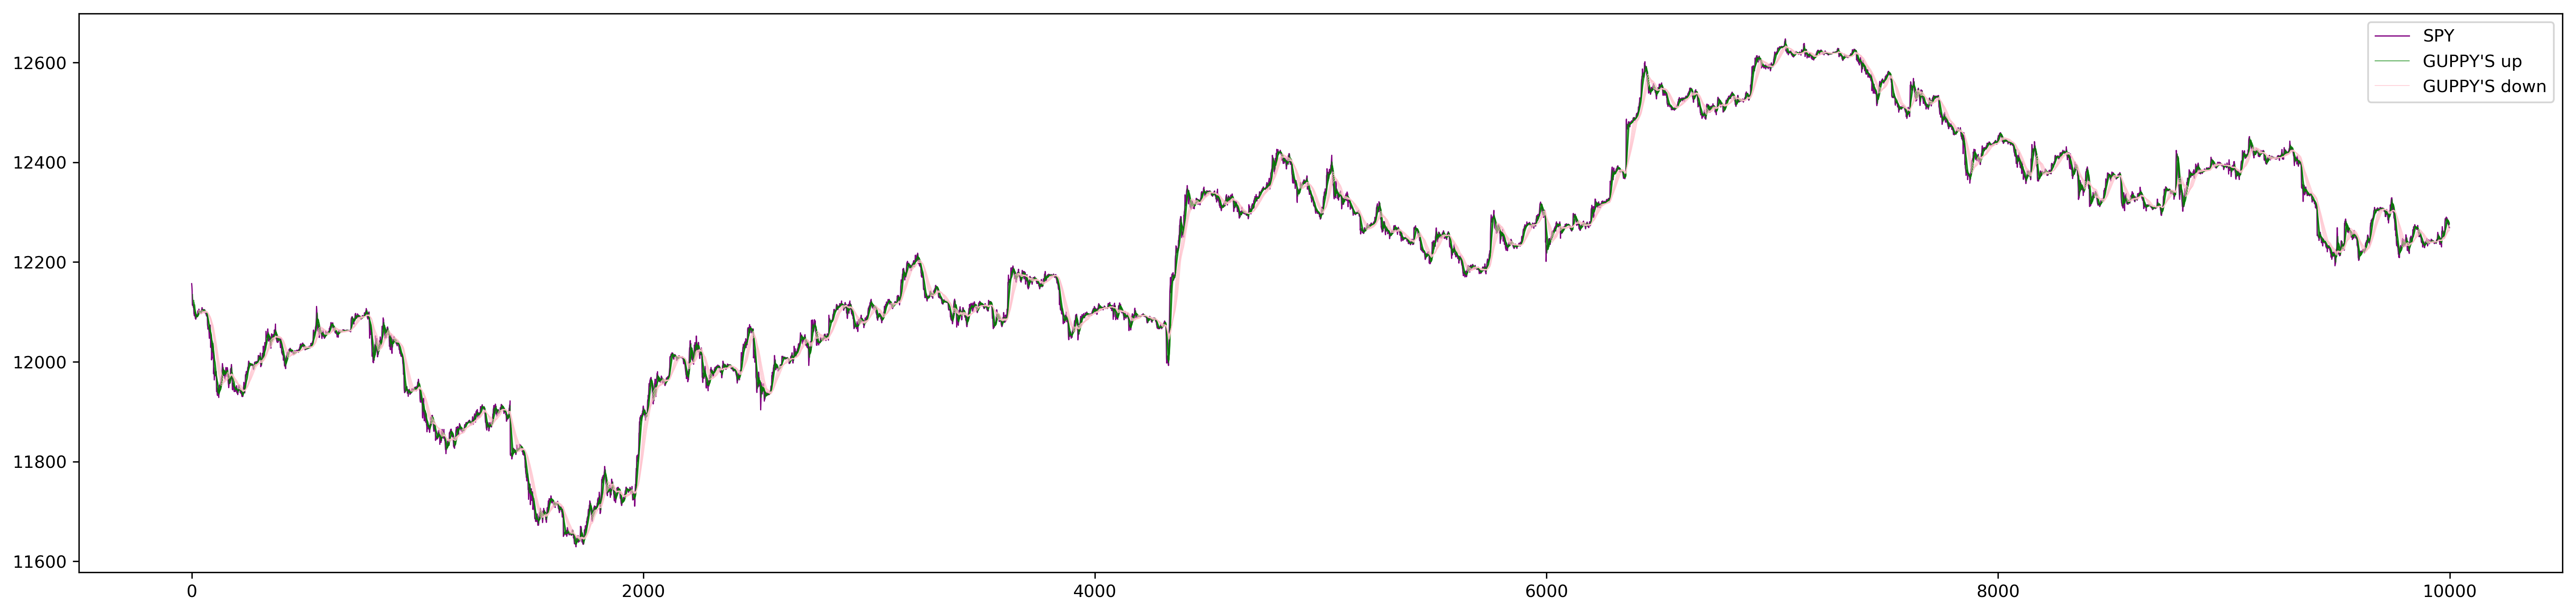

In [79]:
plt.figure(figsize=(26,6),dpi=300)
plt.plot(df['Close'],label = 'SPY',color='purple',lw=0.7)
plt.plot(sma5,label = "GUPPY'S up", color='g', alpha=0.7,lw=0.5)
plt.plot(sma10, color='g', alpha=0.7,lw=0.5)
plt.plot(sma10, color='g', alpha=0.7,lw=0.5)
plt.plot(sma12, color='g', alpha=0.7,lw=0.5)
plt.plot(sma15, color='g', alpha=0.7,lw=0.5)
plt.plot(sma30, label = "GUPPY'S down", color='pink', alpha=0.7,lw=0.5)
plt.plot(sma35, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma40, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma45, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma50, color='pink', alpha=0.7,lw=0.5)
plt.legend()
plt.show()

In [80]:
bbdelta = upper - middle
atr = talib.ATR(df['High'],df['Low'],df['Close'],timeperiod=14)
price_bolup = df['Close'] - lower
price_bolow = df['Close'] - upper
varop_spy = df['Open'] - df['Close']
varhl_spy = df['High'] - df['Low']
df['Varop_Spy'] = varop_spy
df['Varhl_spy'] = varhl_spy
df['RSI'] = rsi
df['delta5_8'] = delta5_8
df['delta8_10'] = delta8_10
df['delta10_12'] = delta10_12
df['delta12_15'] = delta12_15
df['delta15_30'] = delta15_30
df['delta30_35'] = delta30_35
df['delta35_40'] = delta35_40
df['delta40_45'] = delta40_45
df['delta45_50'] = delta45_50
df['BoloUp'] = price_bolup
df['Bolow'] = price_bolow
df['Lower'] = lower
df['ATR'] = atr

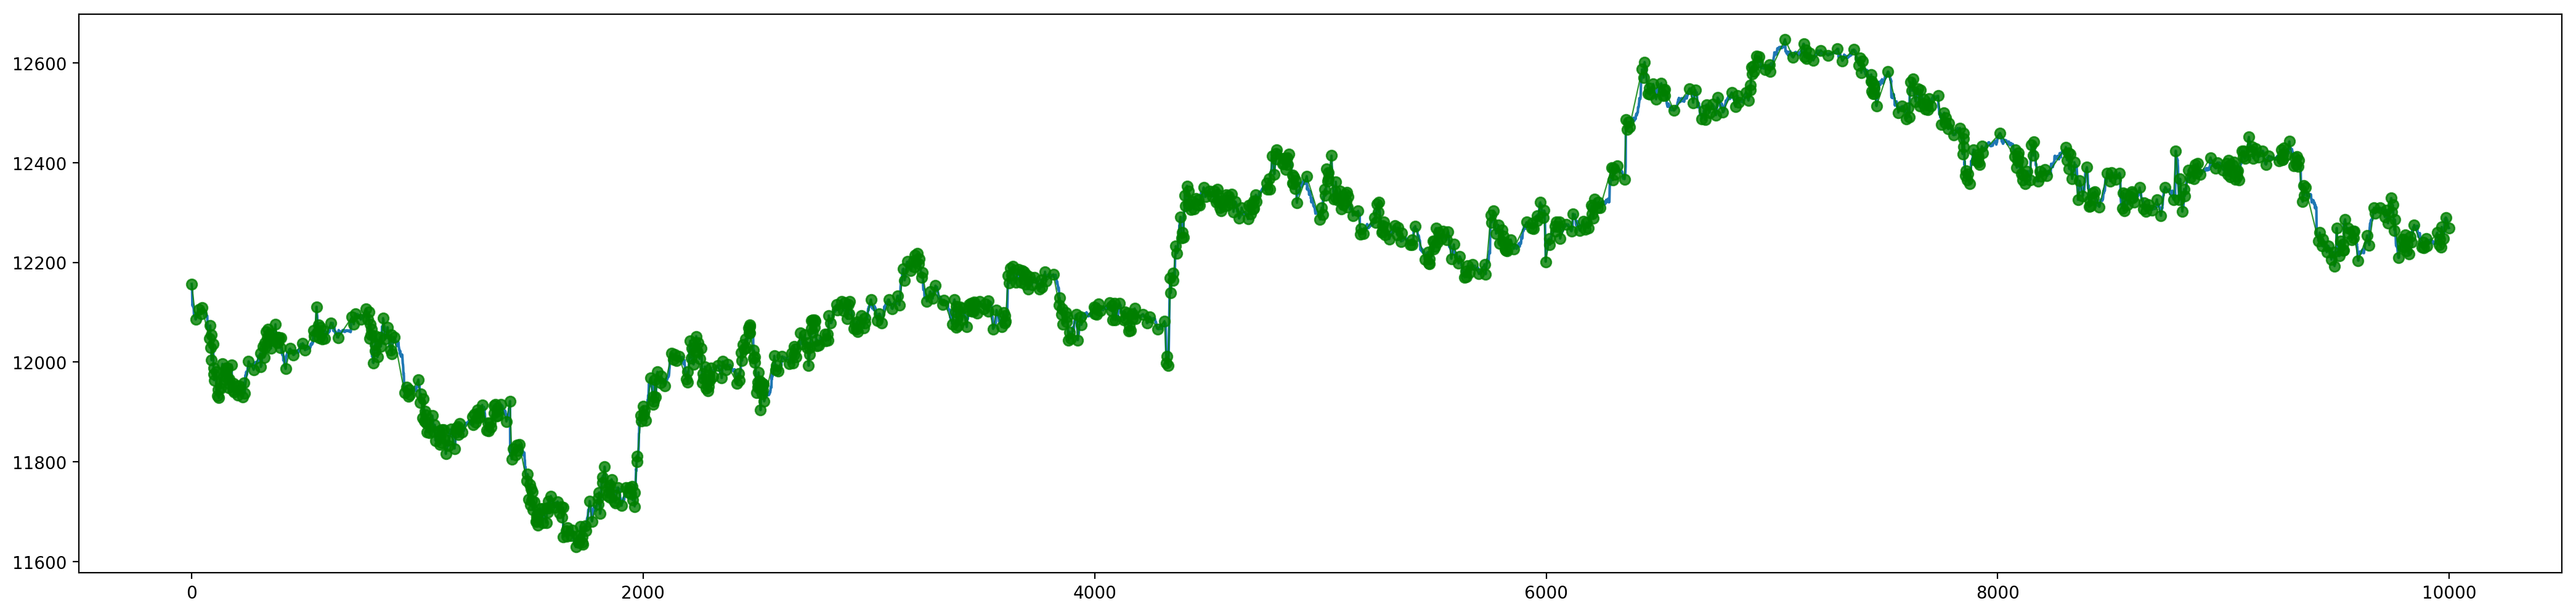

In [81]:
X = df['Close']
a = (float(talib.ATR(df['High'],df['Low'],df['Close'],timeperiod=14).tail(1)))/13000
pivots = peak_valley_pivots(X.values, a, -a)
ts_pivots = pd.Series(X, index=X.index)
ts_pivots = ts_pivots[pivots != 0]
plt.figure(figsize=(26,6),dpi=200)
X.plot()
ts_pivots.plot(style='g-o',lw=0.8,alpha=0.8);

peak = []
valley = []

for i in range(0,df.shape[0]):
    if pivots[i] == 1:
        peak.append(pivots[i])
        valley.append(0)
    elif pivots[i] == -1:
        peak.append(0)
        valley.append(-pivots[i])
    else:
        peak.append(0)
        valley.append(0)
        

In [82]:
df['Move Up'] = valley
df['Move Down'] = peak

In [ ]:
df.tail()

Date     Open     High      Low    Close  Varop_Spy  \
9995 2019-07-22 09:35:00  12275.6  12284.4  12275.4  12277.9       -2.3   
9996 2019-07-22 09:40:00  12277.9  12279.1  12269.2  12269.2        8.7   
9997 2019-07-22 09:45:00  12269.2  12271.5  12262.2  12270.1       -0.9   
9998 2019-07-22 09:50:00  12270.1  12271.6  12266.9  12270.1        0.0   
9999 2019-07-22 09:55:00  12270.1  12273.1  12268.4  12268.9        1.2   

      Varhl_spy        RSI  delta5_8  delta8_10    ...      delta30_35  \
9995        9.0  43.899777   -0.2825    -0.4175    ...        4.578571   
9996        9.9  11.745931   -0.8950    -1.5150    ...        4.090952   
9997        9.3  23.359883   -2.7800    -1.1400    ...        3.195714   
9998        4.7  23.359883   -3.8950    -0.2450    ...        2.218571   
9999        4.7  13.726174   -3.3225    -1.2575    ...        1.402857   

      delta35_40  delta40_45  delta45_50    BoloUp      Bolow         Lower  \
9995    3.233929    1.913056    0.754444  4.792042 -11.147597  12273.107958   
9996    3.315714    2.332222    0.787778  0.359589 -20.915145  12268.840411   
9997    3.311786    2.793611    0.986889  2.708732 -17.419843  12267.391268   
9998    3.786429    2.938333    1.212667  4.567510 -17.545288  12265.532490   
9999    4.337143    2.933333    1.478667  5.287390 -18.754056  12263.612610   

            ATR  Move Up  Move Down  
9995  10.517431        0          0  
9996  10.473329        0          0  
9997  10.389520        0          0  
9998   9.983125        0          0  
9999   9.605759        1          0  

[5 rows x 23 columns]

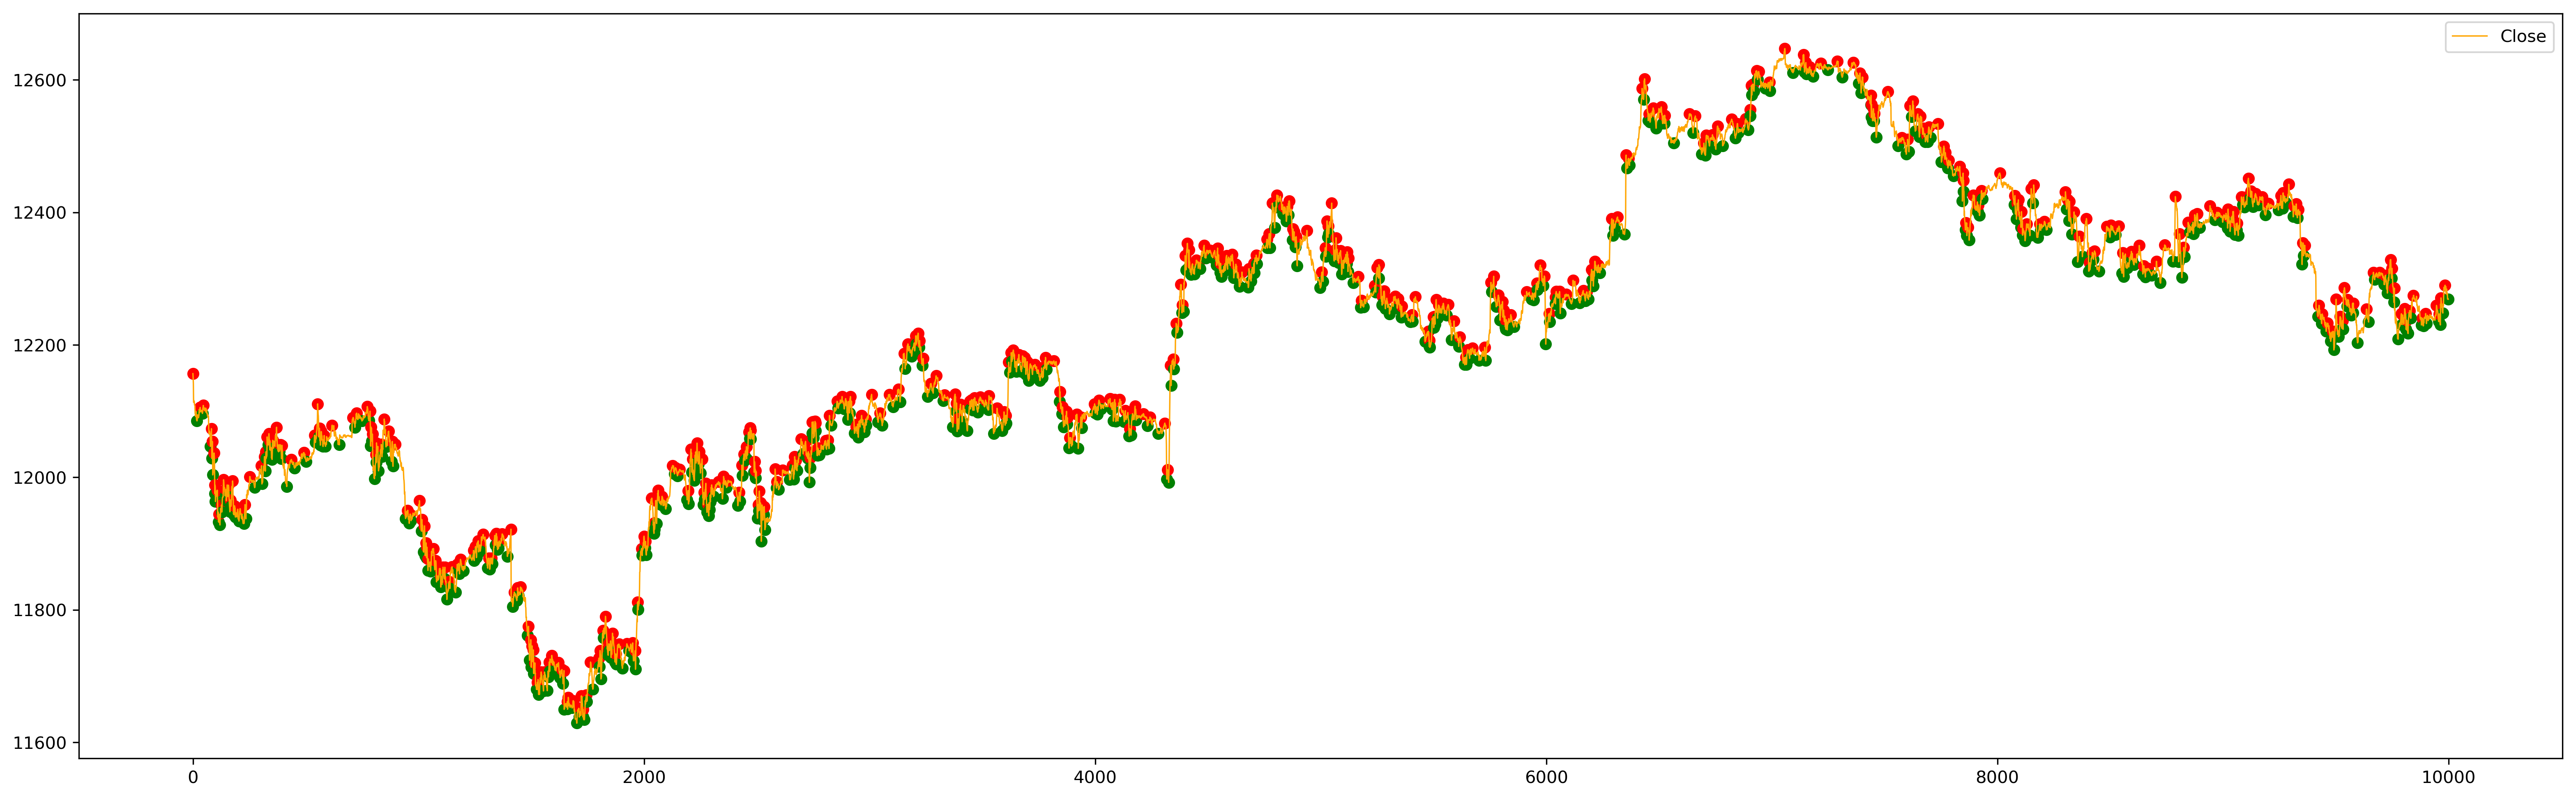

In [ ]:
plt.figure(figsize=(26,8),dpi=300)
plt.plot(df['Close'],color='orange',lw=0.8)
for i in range(0,len(df)):
    if df.iloc[i,-2] == 1:
        plt.scatter(x=df.index[i],y=df.iloc[i,4],c='g',marker='o')
    elif df.iloc[i,-1] == 1:
        plt.scatter(x=df.index[i],y=df.iloc[i,4],c='r',marker='o')
plt.legend()

In [ ]:
delta = round(df.shape[0])
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("# of periods : ",delta)
print('On 80% - 20% slash : ')
print('Bloc 1 : ',bloc1,' periods (',df.iloc[bloc1,0],')\nBloc 2 :',bloc2,' periods (',df.iloc[bloc2,0],')')
print('First period :',df.iloc[0,0])
print('Last period :',df.iloc[df.shape[0]-1,0])

# of periods :  10000
On 80% - 20% slash : 
Bloc 1 :  8000  periods ( 2019-07-09 19:55:00 )
Bloc 2 : 2000  periods ( 2019-06-04 10:10:00 )
First period : 2019-05-22 19:45:00
Last period : 2019-07-22 09:55:00


In [ ]:
df = df.dropna()
df.isnull().sum().sum()

0

In [ ]:
X = df.iloc[:,1:-2]
y_up = df.iloc[:,-2].values
y_down = df.iloc[:,-1].values

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
y_up = np.array(y_up).reshape(-1,1)
y_down = np.array(y_down).reshape(-1,1)

In [ ]:
Xtrain = X[:bloc1,:]
Xtest = X[bloc1:,:]
ytrain_up = y_up[:bloc1,:]
ytest_up = y_up[bloc1:,:]
ytrain_down = y_down[:bloc1,:]
ytest_down = y_down[bloc1:,:]

In [ ]:
Xtrain.shape,ytrain_up.shape,ytrain_down.shape,ytest_down.shape,ytest_up.shape

((8000, 20), (8000, 1), (8000, 1), (1951, 1), (1951, 1))

In [ ]:
# fix random seed for reproducibility
seed = 770
np.random.seed(seed)

In [ ]:
ytrain_up = ytrain_up.reshape(ytrain_up.shape[0],)
ytrain_down = ytrain_down.reshape(ytrain_down.shape[0],)

Xtrain = Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1])

model_up = Sequential()
# Add an input layer 
model_up.add(Dense(5000, activation='relu'))
# Add one hidden layer 
model_up.add(Dense(2500, activation='relu'))
# Add an input layer 
model_up.add(Dense(1250, activation='relu'))
# Add one hidden layer 
model_up.add(Dense(670, activation='relu'))
# Add an output layer 
model_up.add(Dense(1, activation='sigmoid'))

model_down = Sequential()
# Add an input layer 
model_down.add(Dense(5, activation='relu'))
# Add one hidden layer 
model_down.add(Dense(25, activation='relu'))
# Add an input layer 
model_down.add(Dense(12, activation='relu'))
# Add one hidden layer 
model_down.add(Dense(6, activation='relu'))
# Add an output layer 
model_down.add(Dense(1, activation='sigmoid'))

In [ ]:
print('Processing move_up')
model_up.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','mse'])
                   
history_up = model_up.fit(Xtrain, ytrain_up,epochs=5000, batch_size=32, verbose=0)

print('Processing move_down')
model_down.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','mse'])
                   
history_down = model_down.fit(Xtrain, ytrain_down,epochs=5000, batch_size=32, verbose=0)

print('Computing done')

Processing move_up


In [ ]:
train_acc_up = model_up.evaluate(Xtrain, ytrain_up,verbose=1)
train_acc_down = model_down.evaluate(Xtrain, ytrain_down,verbose=1)
train_acc_up,train_acc_down

In [ ]:
yhat_up = model_up.predict_classes(Xtest)
yhat_down = model_down.predict_classes(Xtest)

In [ ]:
score_up = model_up.evaluate(Xtest, ytest_up,verbose=1)
score_down = model_down.evaluate(Xtest, ytest_down,verbose=1)
score_up,score_down

In [ ]:
predict_up = model_up.predict(Xtest)
predict_down = model_down.predict(Xtest)

In [ ]:
accuracy_up = accuracy_score(ytest_up, yhat_up)
accuracy_down = accuracy_score(ytest_down, yhat_down)

# La précision permet de mesurer la capacité du modèle à refuser résultats non-pertinents : vrais_positifs/(vrais_positifs+faux_positifs)
precision_up = precision_score(ytest_up, yhat_up)  
precision_down = precision_score(ytest_down, yhat_down) 


# Recall : (vrai_positifs/(vrais_positifs+faux_négatifs))
recall_up = recall_score(ytest_up, yhat_up) 
recall_down = recall_score(ytest_down, yhat_down) 


roc_up=roc_auc_score(ytest_up,yhat_up)
roc_down=roc_auc_score(ytest_down,yhat_down)

In [ ]:
print('RESULTATS UP\n')
print('Accuracy: %.2f%%' % (accuracy_up * 100.0))
print("Precision: %.2f%% " % (precision_up *100),' => Discrimnination des vrais positifs parmi les faux positifs')
print("Recall: %.2f%% " % (recall_up * 100),' => Positifs trouvés par Golem sur tous les positifs existants')
print("ROC: %.2f%% " % (roc_up *100))
# get probabilities for positive class

print(classification_report(ytest_up, yhat_up))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(ytest_up, yhat_up))
print('Matrice de confusion :')
conf_matrix

In [ ]:
print('RESULTATS DOWN\n')
print('Accuracy: %.2f%%' % (accuracy_down * 100.0))
print("Precision: %.2f%% " % (precision_down *100),' => Discrimnination des vrais positifs parmi les faux positifs')
print("Recall: %.2f%% " % (recall_down * 100),' => Positifs trouvés par Golem sur tous les positifs existants')
print("ROC: %.2f%% " % (roc_down *100))
# get probabilities for positive class

print(classification_report(ytest_down, yhat_down))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(ytest_down, yhat_down))
print('Matrice de confusion :')
conf_matrix

In [465]:
len(pivots)

10000

In [405]:
bbdelta = upper - middle
price_bolup = dataset_1D['Close'] - lower
price_bolow = dataset_1D['Close'] - upper

In [406]:
ts_pivots.shape,bbdelta.shape,price_bolup.shape,price_bolow.shape

((59,), (10000,), (10000,), (10000,))

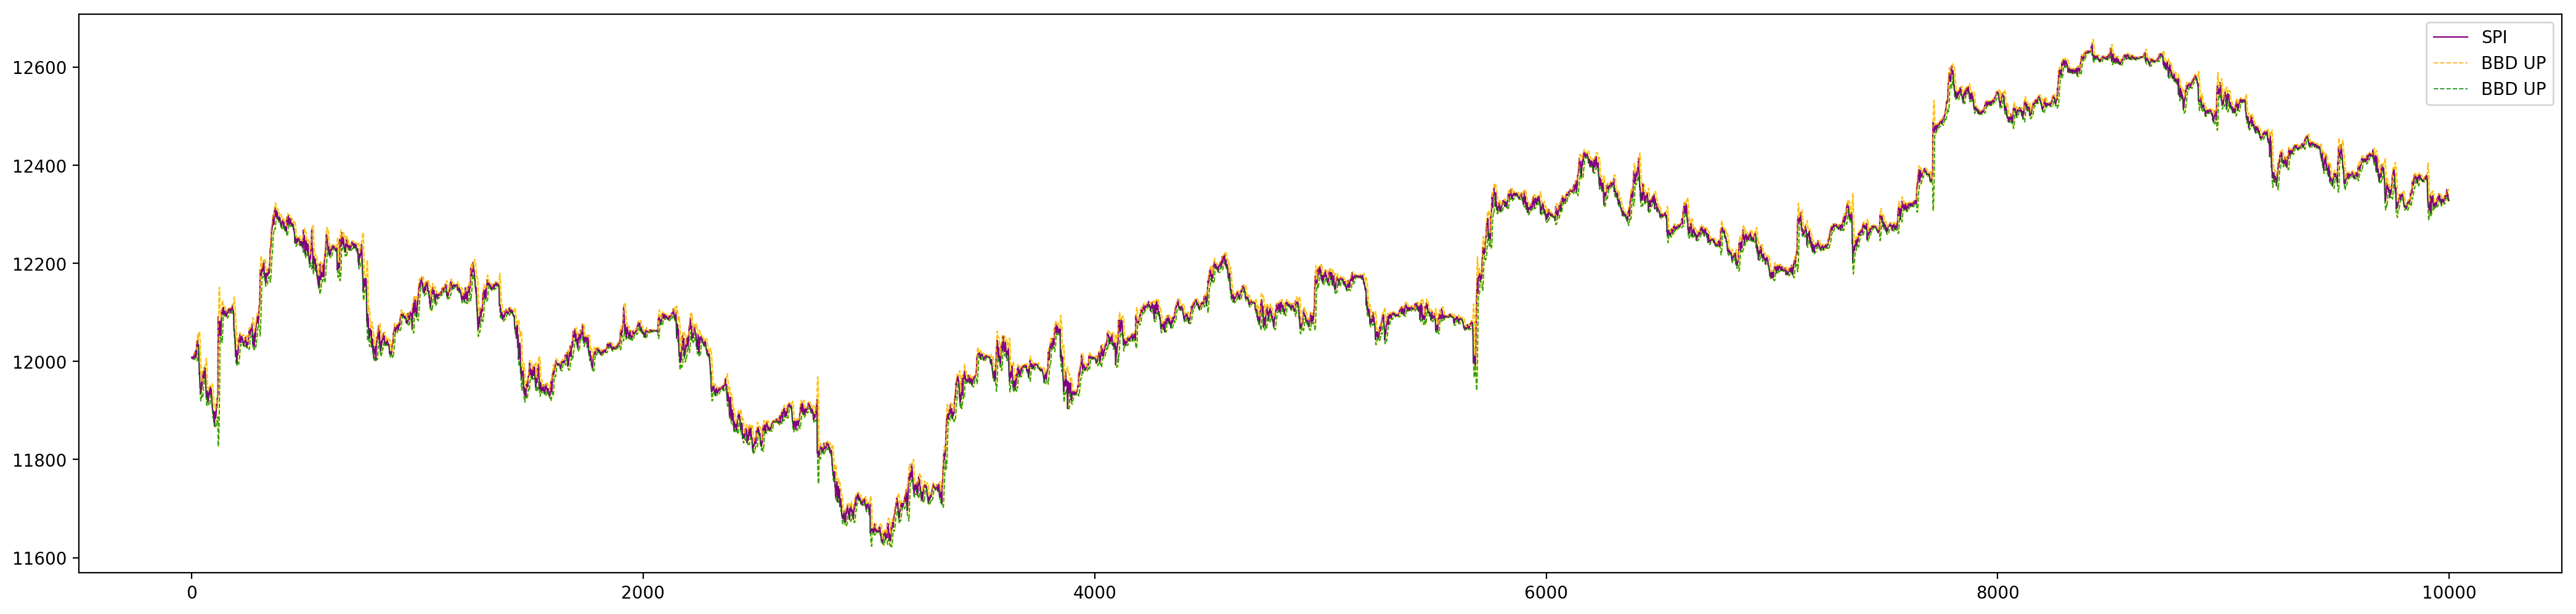

In [407]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Close'],label = 'SPI',color='purple',lw=0.8)
plt.plot(upper,label='BBD UP',color = 'orange',linestyle='--',lw=0.7,alpha=0.8)
plt.plot(lower,label='BBD UP',color = 'green',linestyle='--',lw=0.7,alpha=0.8)
plt.fill_between(x=dataset_1D.index,y1=upper,y2=lower,color='yellow',alpha=0.3)
plt.legend()
plt.show()

In [408]:
rsi25_list = []
rsi75_list = []
for i in range(0,dataset_1D.shape[0]):
    try:
        rsi75_list.append(80 - rsi[i])
        rsi25_list.append(rsi[i] - 20)
    except:
        rsi75_list.append(0)
        rsi25_list.append(0)

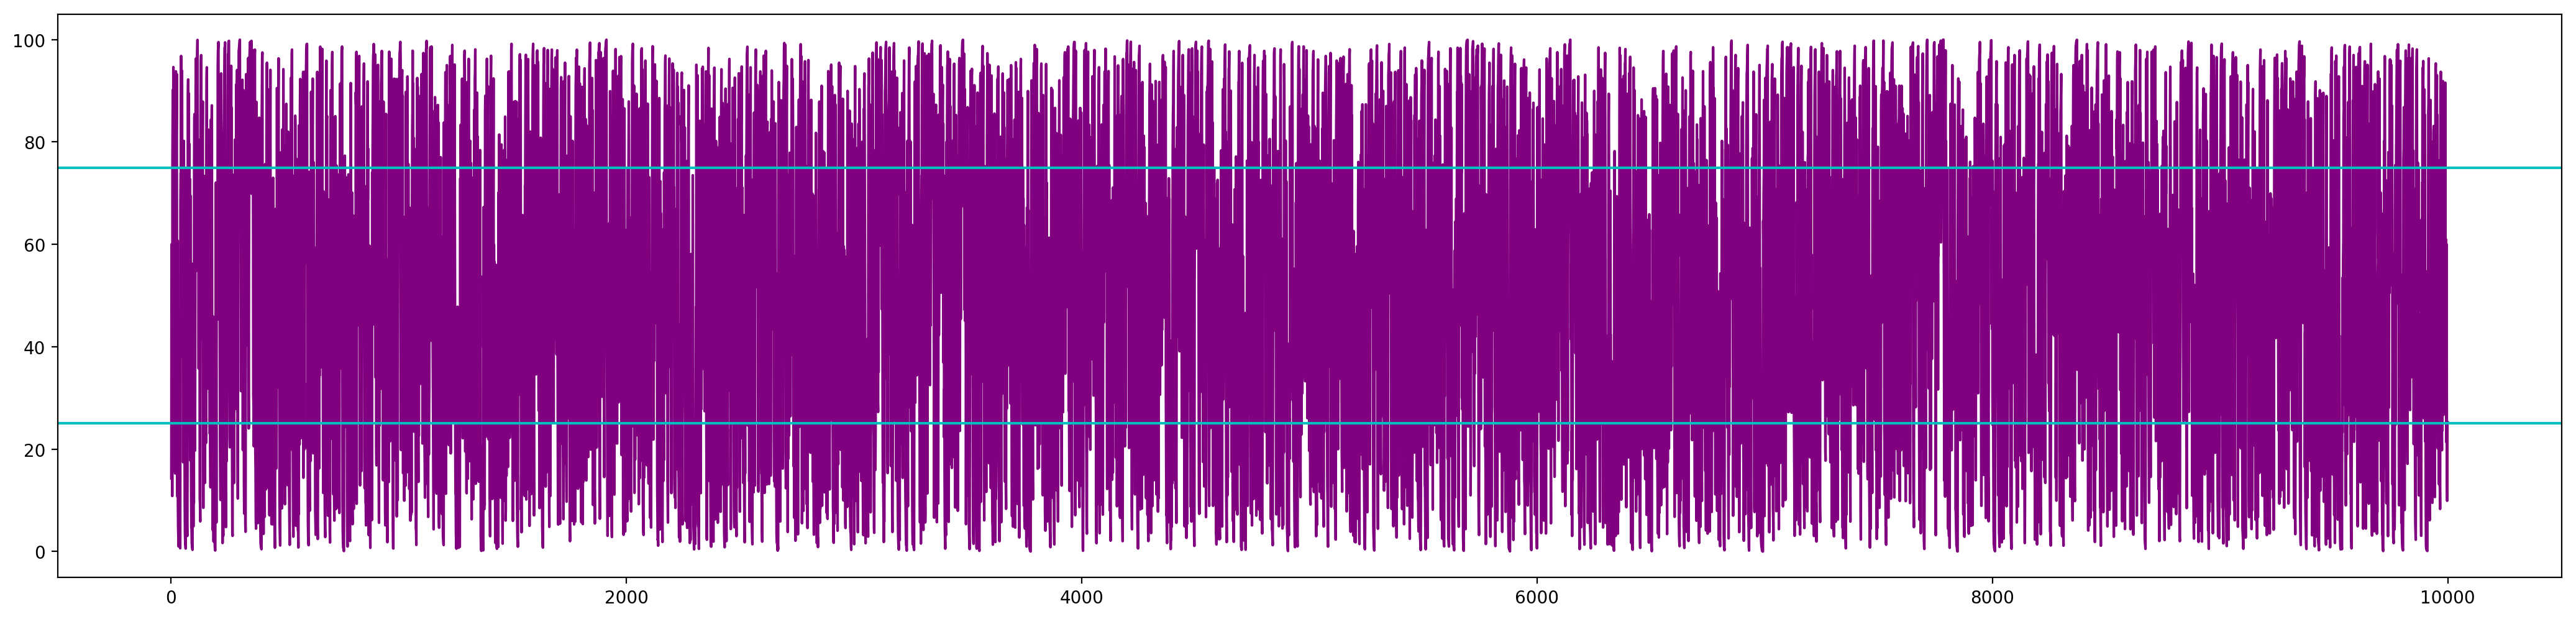

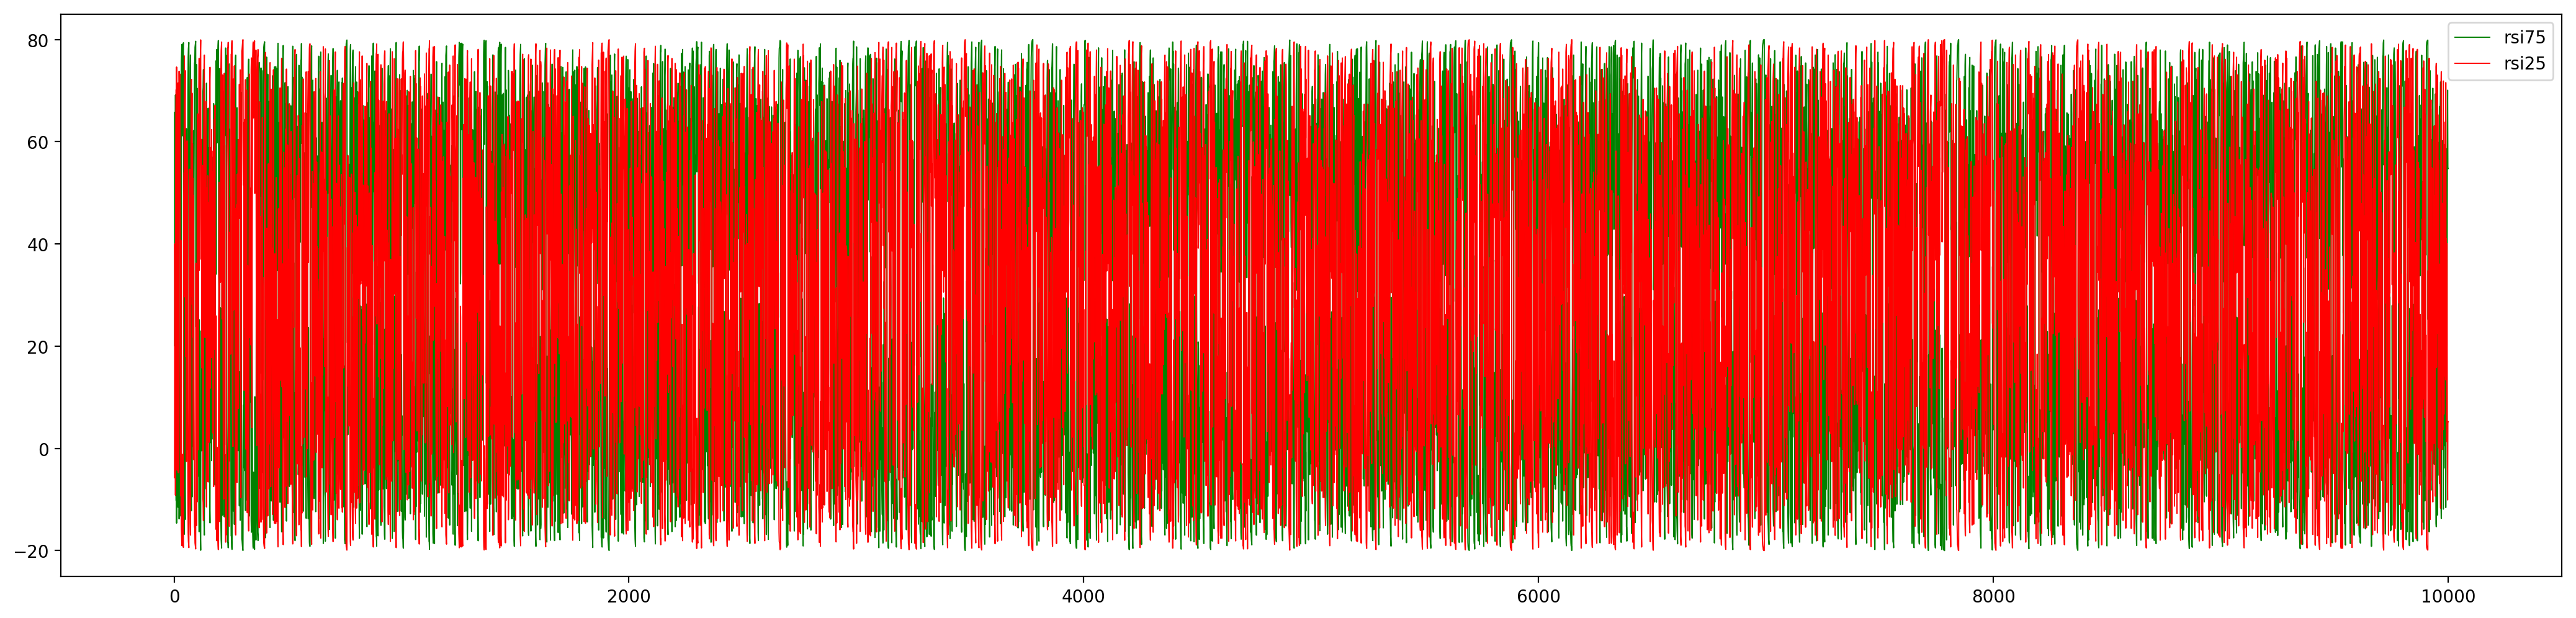

In [409]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(rsi,label = 'RSI',color='purple')
plt.axhline(y=75,color='c')
plt.axhline(y=25,color='c')

plt.figure(figsize=(26,6),dpi=200)
plt.plot(rsi75_list,label='rsi75',color='green',lw=0.7)
plt.plot(rsi25_list,label='rsi25',color='r',lw=0.7)

plt.legend()
plt.show()

In [410]:
varop_spy = dataset_1D['Open'] - dataset_1D['Close']
varhl_spy = dataset_1D['High'] - dataset_1D['Low']

In [411]:
varop_spy.shape,varhl_spy.shape

((10000,), (10000,))

In [412]:
varop_spy = dataset_1D['Open'] - dataset_1D['Close']
varhl_spy = dataset_1D['High'] - dataset_1D['Low']
dataset_1D['Varop_Spy'] = varop_spy
dataset_1D['Varhl_spy'] = varhl_spy
dataset_1D['RSI'] = rsi
dataset_1D['75 - RSI'] = np.array(rsi75_list)
dataset_1D['RSI - 25'] = np.array(rsi25_list)

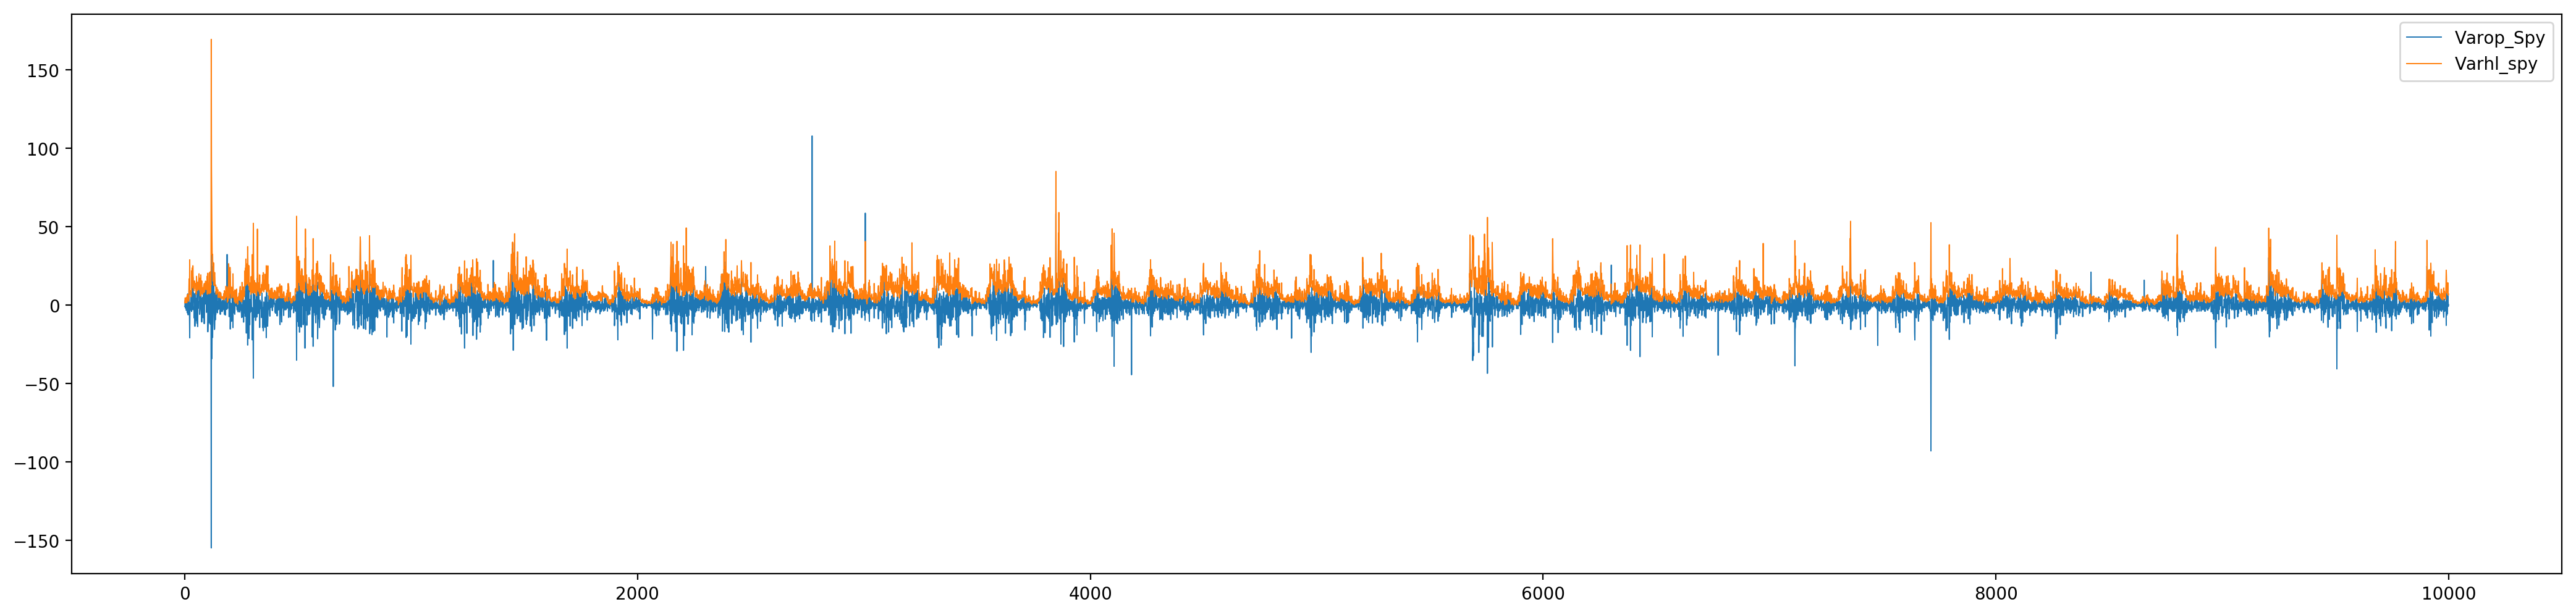

In [413]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Varop_Spy'],label = 'Varop_Spy',lw=0.7)
plt.plot(dataset_1D['Varhl_spy'],label = 'Varhl_spy',lw=0.7)
plt.legend()

In [414]:
dataset_1D.tail()

Date     Open     High      Low    Close  Varop_Spy  \
9995 2019-07-12 14:05:00  12340.4  12341.4  12333.7  12337.3        3.1   
9996 2019-07-12 14:10:00  12337.3  12337.3  12323.2  12331.0        6.3   
9997 2019-07-12 14:15:00  12331.1  12332.6  12326.1  12327.6        3.5   
9998 2019-07-12 14:20:00  12327.5  12331.5  12325.4  12328.5       -1.0   
9999 2019-07-12 14:25:00  12328.6  12330.0  12323.1  12328.5        0.1   

      Varhl_spy        RSI   75 - RSI   RSI - 25  
9995        7.7  39.120418  40.879582  19.120418  
9996       14.1  16.185892  63.814108  -3.814108  
9997        6.5   9.913071  70.086929 -10.086929  
9998        6.1  25.249784  54.750216   5.249784  
9999        6.9  25.249784  54.750216   5.249784

In [415]:
dataset_1D['BBD_Delta_Up'] = bbdelta

dataset_1D.tail()

Date     Open     High      Low    Close  Varop_Spy  \
9995 2019-07-12 14:05:00  12340.4  12341.4  12333.7  12337.3        3.1   
9996 2019-07-12 14:10:00  12337.3  12337.3  12323.2  12331.0        6.3   
9997 2019-07-12 14:15:00  12331.1  12332.6  12326.1  12327.6        3.5   
9998 2019-07-12 14:20:00  12327.5  12331.5  12325.4  12328.5       -1.0   
9999 2019-07-12 14:25:00  12328.6  12330.0  12323.1  12328.5        0.1   

      Varhl_spy        RSI   75 - RSI   RSI - 25  BBD_Delta_Up  
9995        7.7  39.120418  40.879582  19.120418      8.712925  
9996       14.1  16.185892  63.814108  -3.814108     10.438154  
9997        6.5   9.913071  70.086929 -10.086929     12.725128  
9998        6.1  25.249784  54.750216   5.249784     10.881086  
9999        6.9  25.249784  54.750216   5.249784     11.655466

In [416]:
dataset_1D['delta5_8'] = delta5_8
dataset_1D['delta8_10'] = delta8_10
dataset_1D['delta10_12'] = delta10_12
dataset_1D['delta12_15'] = delta12_15
dataset_1D['delta15_30'] = delta15_30
dataset_1D['delta30_35'] = delta30_35
dataset_1D['delta35_40'] = delta35_40
dataset_1D['delta40_45'] = delta40_45
dataset_1D['delta45_50'] = delta45_50

In [417]:
dataset_1D.tail()

Date     Open     High      Low    Close  Varop_Spy  \
9995 2019-07-12 14:05:00  12340.4  12341.4  12333.7  12337.3        3.1   
9996 2019-07-12 14:10:00  12337.3  12337.3  12323.2  12331.0        6.3   
9997 2019-07-12 14:15:00  12331.1  12332.6  12326.1  12327.6        3.5   
9998 2019-07-12 14:20:00  12327.5  12331.5  12325.4  12328.5       -1.0   
9999 2019-07-12 14:25:00  12328.6  12330.0  12323.1  12328.5        0.1   

      Varhl_spy        RSI   75 - RSI   RSI - 25  BBD_Delta_Up  delta5_8  \
9995        7.7  39.120418  40.879582  19.120418      8.712925   -0.7925   
9996       14.1  16.185892  63.814108  -3.814108     10.438154   -2.7475   
9997        6.5   9.913071  70.086929 -10.086929     12.725128   -2.4875   
9998        6.1  25.249784  54.750216   5.249784     10.881086   -2.5650   
9999        6.9  25.249784  54.750216   5.249784     11.655466   -2.9575   

      delta8_10  delta10_12  delta12_15  delta15_30  delta30_35  delta35_40  \
9995     0.3725    0.506667    0.800000    5.013333    1.217143   -0.052143   
9996     0.3075    0.396667    0.316667    4.610000    1.430952    0.015714   
9997    -1.3425   -0.053333    0.190000    3.943333    1.590000    0.127500   
9998    -1.6750   -0.125000    0.051667    3.336667    1.462381    0.481786   
9999    -1.5125   -1.391667   -0.225000    2.796667    1.212857    0.792143   

      delta40_45  delta45_50  
9995   -0.367222    0.232222  
9996   -0.236667    0.166667  
9997   -0.218611    0.065111  
9998   -0.345278   -0.074222  
9999   -0.192778   -0.340222

In [418]:
len(peak),len(valley),len(ts_pivots),sum(peak),sum(valley)

(10000, 10000, 59, 30, -29)

In [419]:
modes = pivots_to_modes(pivots)
pd.Series(X).pct_change().groupby(modes).describe().unstack()

count  -1    5089.000000
        1    4910.000000
mean   -1      -0.000068
        1       0.000076
std    -1       0.000522
        1       0.000551
min    -1      -0.009032
        1      -0.003427
25%    -1      -0.000253
        1      -0.000168
50%    -1      -0.000039
        1       0.000041
75%    -1       0.000170
        1       0.000280
max    -1       0.002882
        1       0.012978
dtype: float64

In [420]:
compute_segment_returns(X, pivots).sum()

0.0

In [421]:

max_drawdown(np.array(X))

0.055567602336046774

In [422]:
dataset_1D['Peaks'] = abs(np.array(peak))
dataset_1D['Valley'] = abs(np.array(valley))
dataset_1D.tail()

Date     Open     High      Low    Close  Varop_Spy  \
9995 2019-07-12 14:05:00  12340.4  12341.4  12333.7  12337.3        3.1   
9996 2019-07-12 14:10:00  12337.3  12337.3  12323.2  12331.0        6.3   
9997 2019-07-12 14:15:00  12331.1  12332.6  12326.1  12327.6        3.5   
9998 2019-07-12 14:20:00  12327.5  12331.5  12325.4  12328.5       -1.0   
9999 2019-07-12 14:25:00  12328.6  12330.0  12323.1  12328.5        0.1   

      Varhl_spy        RSI   75 - RSI   RSI - 25   ...    delta8_10  \
9995        7.7  39.120418  40.879582  19.120418   ...       0.3725   
9996       14.1  16.185892  63.814108  -3.814108   ...       0.3075   
9997        6.5   9.913071  70.086929 -10.086929   ...      -1.3425   
9998        6.1  25.249784  54.750216   5.249784   ...      -1.6750   
9999        6.9  25.249784  54.750216   5.249784   ...      -1.5125   

      delta10_12  delta12_15  delta15_30  delta30_35  delta35_40  delta40_45  \
9995    0.506667    0.800000    5.013333    1.217143   -0.052143   -0.367222   
9996    0.396667    0.316667    4.610000    1.430952    0.015714   -0.236667   
9997   -0.053333    0.190000    3.943333    1.590000    0.127500   -0.218611   
9998   -0.125000    0.051667    3.336667    1.462381    0.481786   -0.345278   
9999   -1.391667   -0.225000    2.796667    1.212857    0.792143   -0.192778   

      delta45_50  Peaks  Valley  
9995    0.232222      0       0  
9996    0.166667      0       0  
9997    0.065111      0       0  
9998   -0.074222      0       0  
9999   -0.340222      1       0  

[5 rows x 22 columns]

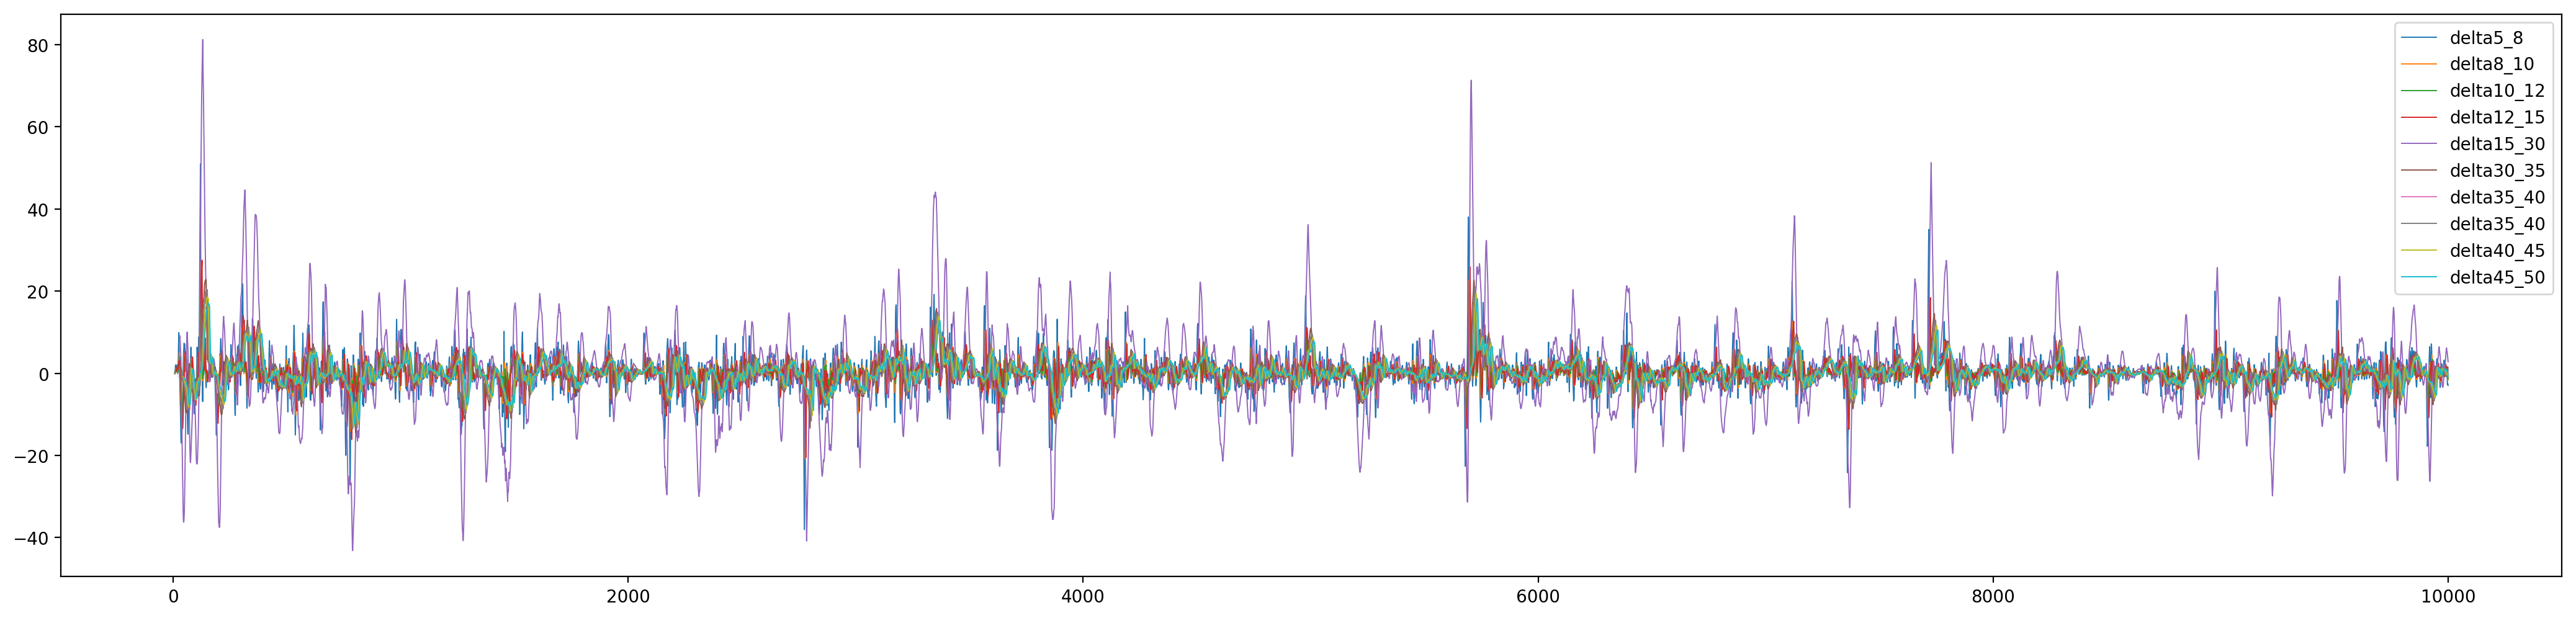

In [423]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['delta5_8'],label = 'delta5_8',lw=0.7)
plt.plot(dataset_1D['delta8_10'],label = 'delta8_10',lw=0.7)
plt.plot(dataset_1D['delta10_12'],label = 'delta10_12',lw=0.7)
plt.plot(dataset_1D['delta12_15'],label = 'delta12_15',lw=0.7)
plt.plot(dataset_1D['delta15_30'],label = 'delta15_30',lw=0.7)
plt.plot(dataset_1D['delta30_35'],label = 'delta30_35',lw=0.7)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.7)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.7)
plt.plot(dataset_1D['delta40_45'],label = 'delta40_45',lw=0.7)
plt.plot(dataset_1D['delta45_50'],label = 'delta45_50',lw=0.7)
plt.legend()

delta_1_2 = []
delta_1_3 =[]
delta_2_3 = []

delta_1_2.append(0)
delta_1_3.append(0)

delta_2_3.append(0)



for i in range(1,dataset_1D.shape[0]-1):
    delta_1_2.append(dataset_1D.iloc[-i,4] - dataset_1D.iloc[-i-1,4])
        
for i in range(1,dataset_1D.shape[0]-2):
     delta_1_3.append(dataset_1D.iloc[-i,4] - dataset_1D.iloc[-i-2,4])
    
for i in range(1,dataset_1D.shape[0]-2):
     delta_2_3.append(dataset_1D.iloc[-i-1,4] - dataset_1D.iloc[-i-2,4])

delta_1_2.append(0)
delta_1_3.append(0)
delta_2_3.append(0)
delta_1_3.append(0)
delta_2_3.append(0)


len(delta_1_2),len(delta_1_3),len(delta_2_3)

dataset_1D['delta_1_2'] = delta_1_2
dataset_1D['delta_2_3'] = delta_2_3
dataset_1D['delta_1_3'] = delta_1_3

In [424]:
dataset_1D.tail()

Date     Open     High      Low    Close  Varop_Spy  \
9995 2019-07-12 14:05:00  12340.4  12341.4  12333.7  12337.3        3.1   
9996 2019-07-12 14:10:00  12337.3  12337.3  12323.2  12331.0        6.3   
9997 2019-07-12 14:15:00  12331.1  12332.6  12326.1  12327.6        3.5   
9998 2019-07-12 14:20:00  12327.5  12331.5  12325.4  12328.5       -1.0   
9999 2019-07-12 14:25:00  12328.6  12330.0  12323.1  12328.5        0.1   

      Varhl_spy        RSI   75 - RSI   RSI - 25   ...    delta8_10  \
9995        7.7  39.120418  40.879582  19.120418   ...       0.3725   
9996       14.1  16.185892  63.814108  -3.814108   ...       0.3075   
9997        6.5   9.913071  70.086929 -10.086929   ...      -1.3425   
9998        6.1  25.249784  54.750216   5.249784   ...      -1.6750   
9999        6.9  25.249784  54.750216   5.249784   ...      -1.5125   

      delta10_12  delta12_15  delta15_30  delta30_35  delta35_40  delta40_45  \
9995    0.506667    0.800000    5.013333    1.217143   -0.052143   -0.367222   
9996    0.396667    0.316667    4.610000    1.430952    0.015714   -0.236667   
9997   -0.053333    0.190000    3.943333    1.590000    0.127500   -0.218611   
9998   -0.125000    0.051667    3.336667    1.462381    0.481786   -0.345278   
9999   -1.391667   -0.225000    2.796667    1.212857    0.792143   -0.192778   

      delta45_50  Peaks  Valley  
9995    0.232222      0       0  
9996    0.166667      0       0  
9997    0.065111      0       0  
9998   -0.074222      0       0  
9999   -0.340222      1       0  

[5 rows x 22 columns]

In [425]:
tsf = talib.TSF(dataset_1D['Close'],timeperiod=14)
type(tsf),len(tsf)

(pandas.core.series.Series, 10000)

In [426]:
delta_tsf = dataset_1D['Close'] - tsf
dataset_1D['delta_tsf'] = tsf
delta_tsf.shape

(10000,)

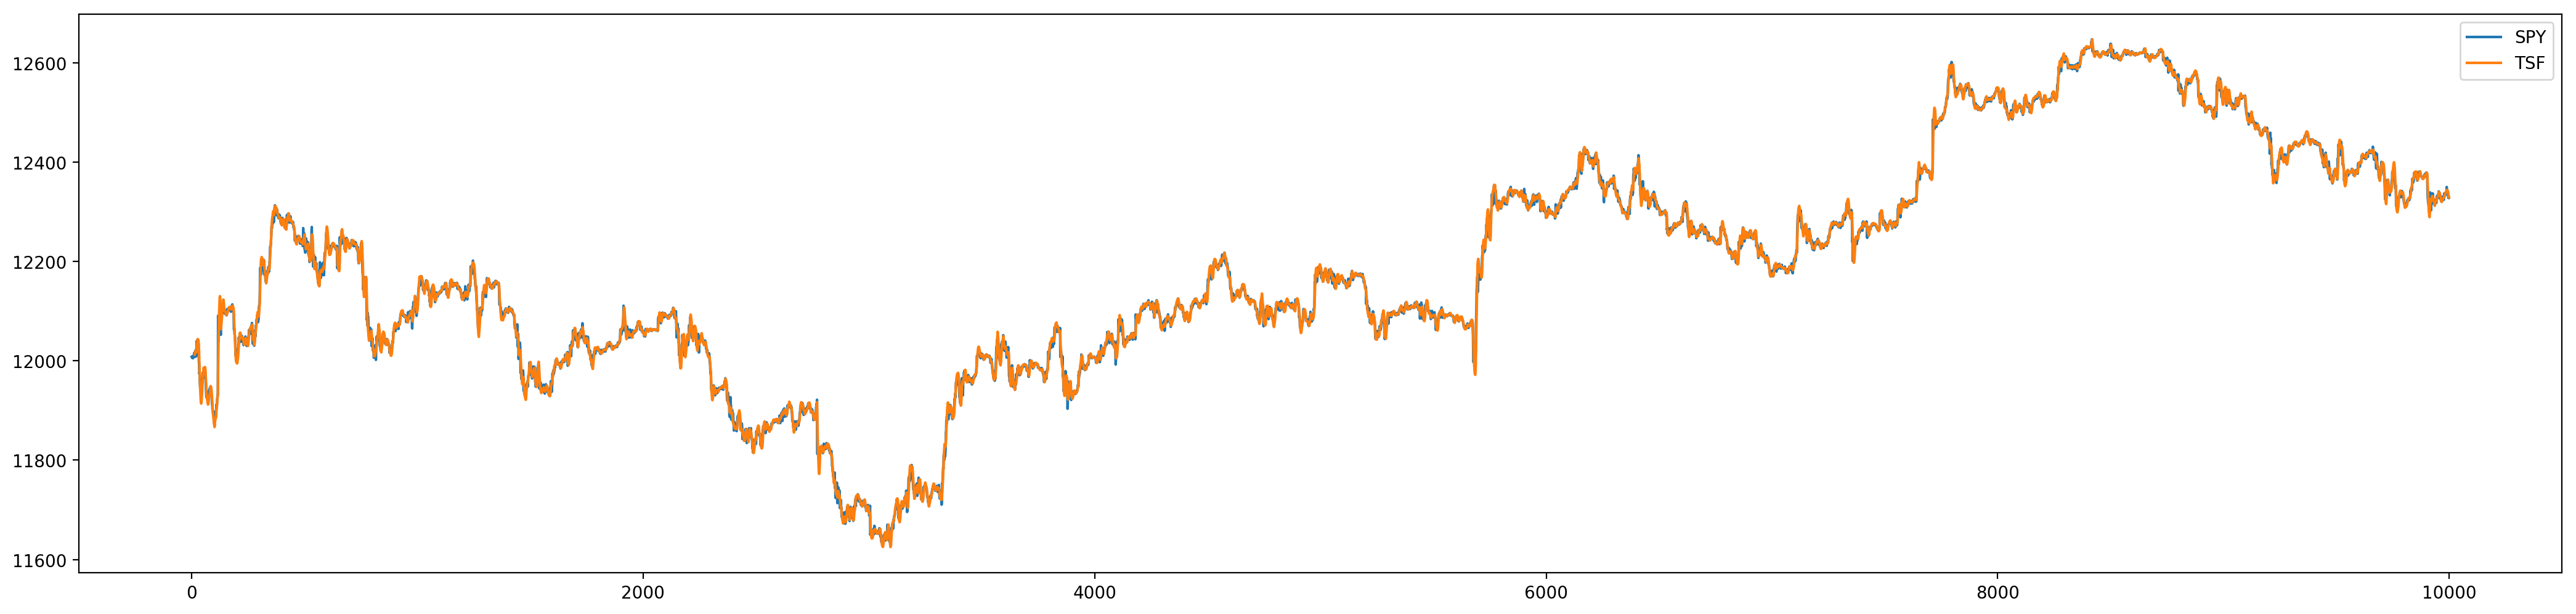

In [427]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Close'],label = 'SPY')
#plt.plot(dataset_1D['delta_tsf'],label = 'DELTA TSF SPY')
plt.plot(tsf,label='TSF')
plt.legend()
plt.show()

In [428]:
forosc = []
forosc.append(0)
for i in range(1,dataset_1D.shape[0]):
    try:
        forosc.append((dataset_1D.iloc[i,4] - tsf[i-1])*100/dataset_1D.iloc[i,4])
    except:
        forosc.append(0)
len(forosc),type(forosc)

(10000, list)

In [429]:
dataset_1D['Forcast Oscillator'] = (forosc)

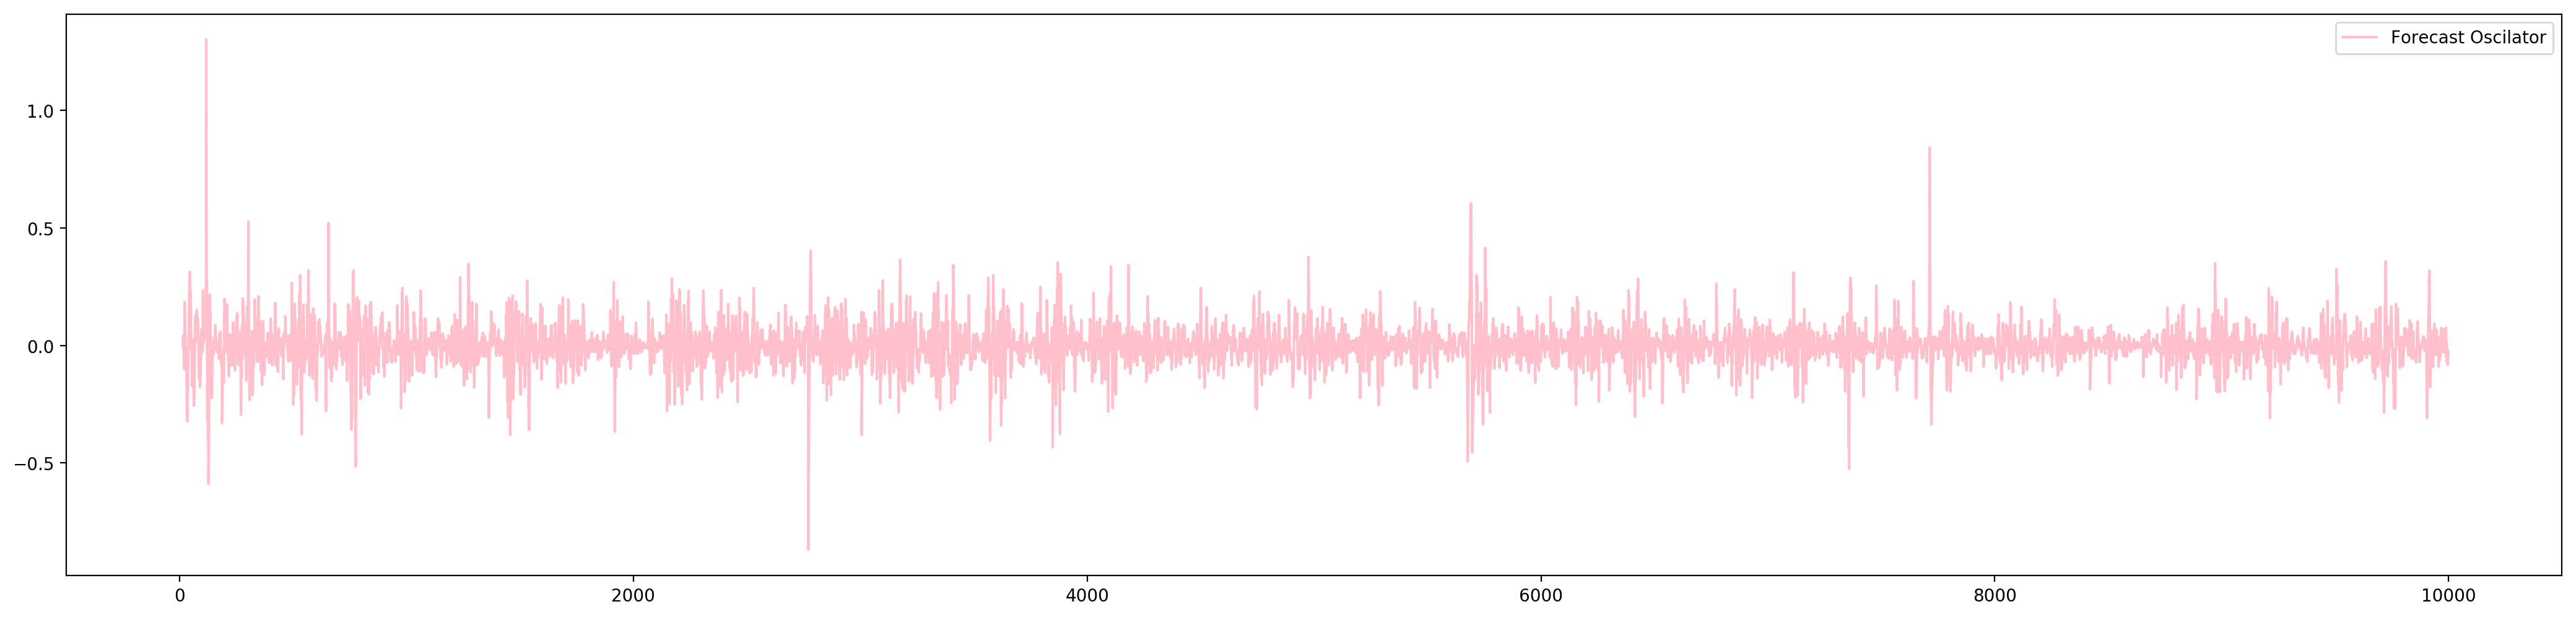

In [430]:
plt.figure(figsize=(26,6),dpi=200)
#plt.plot(dataset_1D['Close'],label = 'SPY')
#plt.plot(dataset_1D['delta_tsf'],label = 'DELTA TSF SPY')
plt.plot(dataset_1D['Forcast Oscillator'],label='Forecast Oscilator',color='pink')
plt.legend()
plt.show()

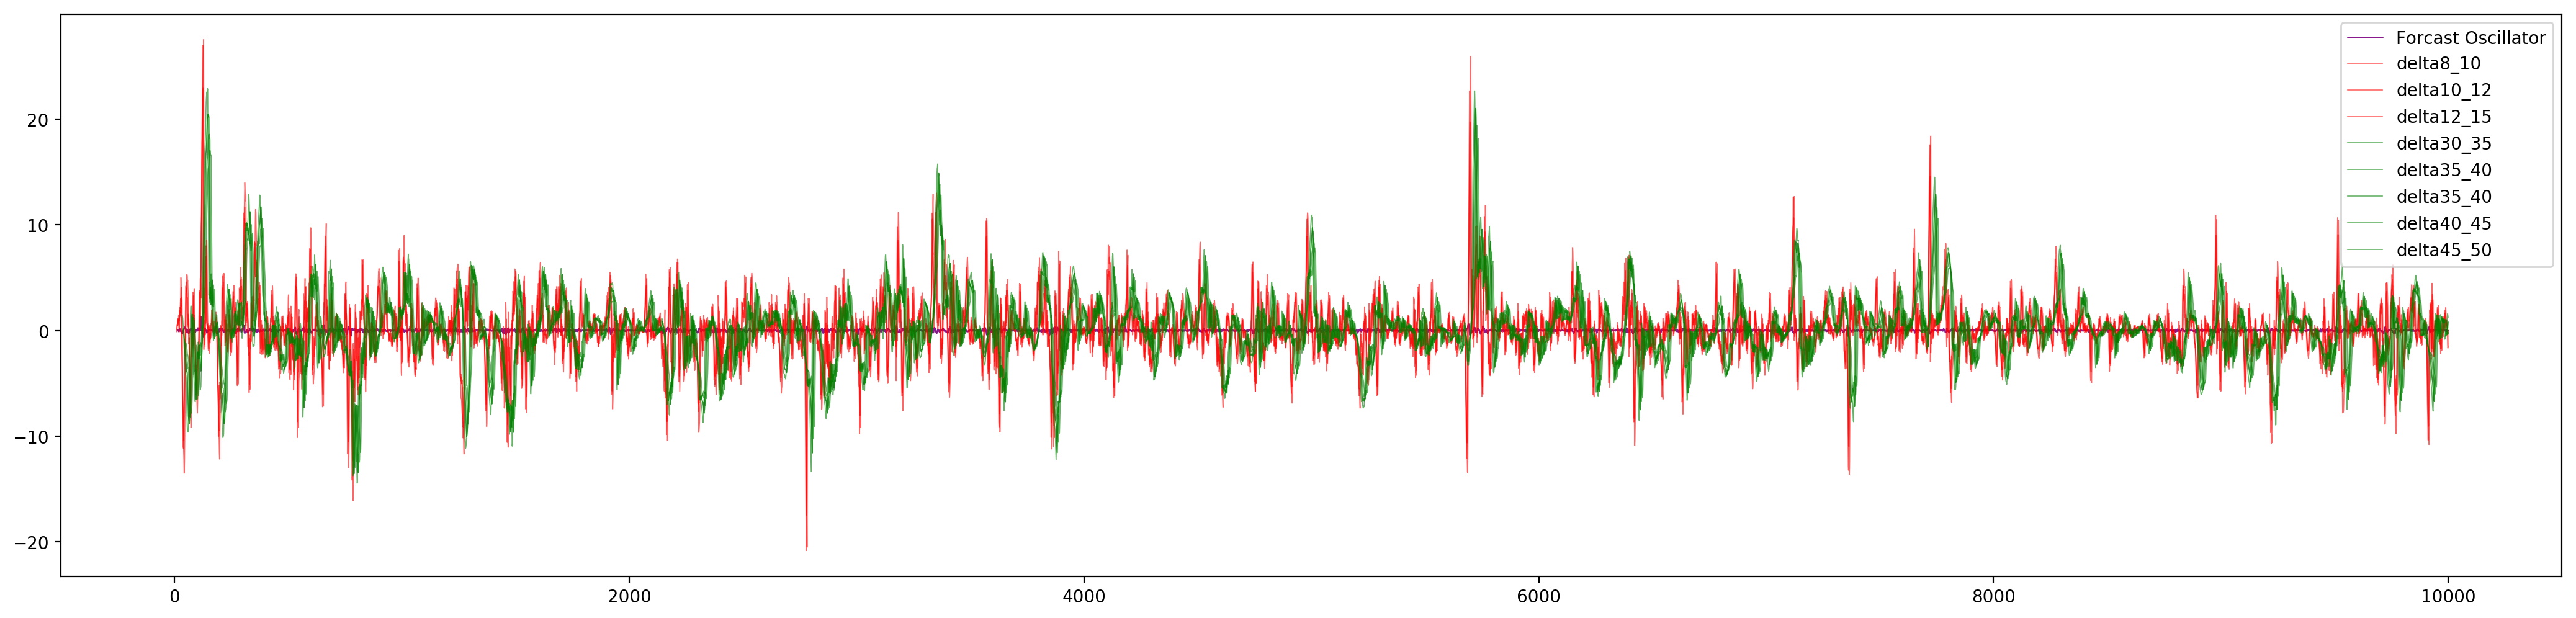

In [431]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Forcast Oscillator'],label = 'Forcast Oscillator',lw=0.9,color='purple',alpha=0.9)
#plt.plot(dataset_1D['delta5_8'],label = 'delta5_8',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta8_10'],label = 'delta8_10',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta10_12'],label = 'delta10_12',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta12_15'],label = 'delta12_15',lw=0.6,color='r',alpha=0.6)
#plt.plot(dataset_1D['delta15_30'],label = 'delta15_30',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta30_35'],label = 'delta30_35',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta40_45'],label = 'delta40_45',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta45_50'],label = 'delta45_50',lw=0.6,color='g',alpha=0.6)
plt.legend()

In [432]:
dataset_1D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 24 columns):
Date                  10000 non-null datetime64[ns]
Open                  10000 non-null float64
High                  10000 non-null float64
Low                   10000 non-null float64
Close                 10000 non-null float64
Varop_Spy             10000 non-null float64
Varhl_spy             10000 non-null float64
RSI                   9998 non-null float64
75 - RSI              9998 non-null float64
RSI - 25              9998 non-null float64
BBD_Delta_Up          9992 non-null float64
delta5_8              9993 non-null float64
delta8_10             9991 non-null float64
delta10_12            9989 non-null float64
delta12_15            9986 non-null float64
delta15_30            9971 non-null float64
delta30_35            9966 non-null float64
delta35_40            9961 non-null float64
delta40_45            9956 non-null float64
delta45_50            9951 non-null float6

In [433]:
df.head(0)

Empty DataFrame
Columns: [Date, Open, High, Low, Close]
Index: []

In [434]:
target_up = []
target_down = []

for i in range(0,dataset_1D.shape[0]-5):
    b = float(talib.ATR(df['High'],df['Low'],df['Close'],timeperiod=14).tail(1))*3
    if (dataset_1D.iloc[i+1,5] * dataset_1D.iloc[i,5]) < 0 :
        if (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4]) > b : #or (df.iloc[i+1,4] - df.iloc[i,3]) > 30:
            target_up.append(1)
            target_down.append(0)
        elif (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4]) < -b : #or (df.iloc[i+1,4] - df.iloc[i,2]) < -30:
            target_up.append(0)
            target_down.append(1)
        else:
            target_up.append(0)
            target_down.append(0)
    else :
        target_up.append(0)
        target_down.append(0) 
        
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)



target_up = []
target_down = []

for i in range(0,dataset_1D.shape[0]-5):
    
    if (dataset_1D.iloc[i+1,7]*dataset_1D.iloc[i,7]) < 0 :
    
        if (dataset_1D.iloc[i+5,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.02 or \
        (dataset_1D.iloc[i+4,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.03 or \
        (dataset_1D.iloc[i+3,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.04 or \
        (dataset_1D.iloc[i+2,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.05 or \
        (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.06 :
            target_up.append(1)
            target_down.append(0)
        elif (dataset_1D.iloc[i+5,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.02 or \
        (dataset_1D.iloc[i+4,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.03 or \
        (dataset_1D.iloc[i+3,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.04 or \
        (dataset_1D.iloc[i+2,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.05 or \
        (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.06 :
            target_up.append(0)
            target_down.append(1)
        else:
            target_up.append(0)
            target_down.append(0)
    else :
        target_up.append(0)
        target_down.append(0) 
        
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)



In [435]:
len(target_up),len(target_down),sum(target_up),sum(target_down)

(10000, 10000, 11, 14)

In [436]:
dataset_1D['target_up'] = target_up  # target_up # abs(np.array(valley))#target_up
dataset_1D['target_down'] = target_down # target_down # abs(np.array(peak))#target_down

dataset_1D['target_up'].sum(),dataset_1D['target_down'].sum()

(11, 14)

In [437]:
dataset_1D['target_value'] = dataset_1D['Close']
dataset_1D = dataset_1D.drop(['Open','High','Low','Close'],axis=1)

In [438]:
dataset_1D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 23 columns):
Date                  10000 non-null datetime64[ns]
Varop_Spy             10000 non-null float64
Varhl_spy             10000 non-null float64
RSI                   9998 non-null float64
75 - RSI              9998 non-null float64
RSI - 25              9998 non-null float64
BBD_Delta_Up          9992 non-null float64
delta5_8              9993 non-null float64
delta8_10             9991 non-null float64
delta10_12            9989 non-null float64
delta12_15            9986 non-null float64
delta15_30            9971 non-null float64
delta30_35            9966 non-null float64
delta35_40            9961 non-null float64
delta40_45            9956 non-null float64
delta45_50            9951 non-null float64
Peaks                 10000 non-null int64
Valley                10000 non-null int64
delta_tsf             9987 non-null float64
Forcast Oscillator    9987 non-null float64
targ

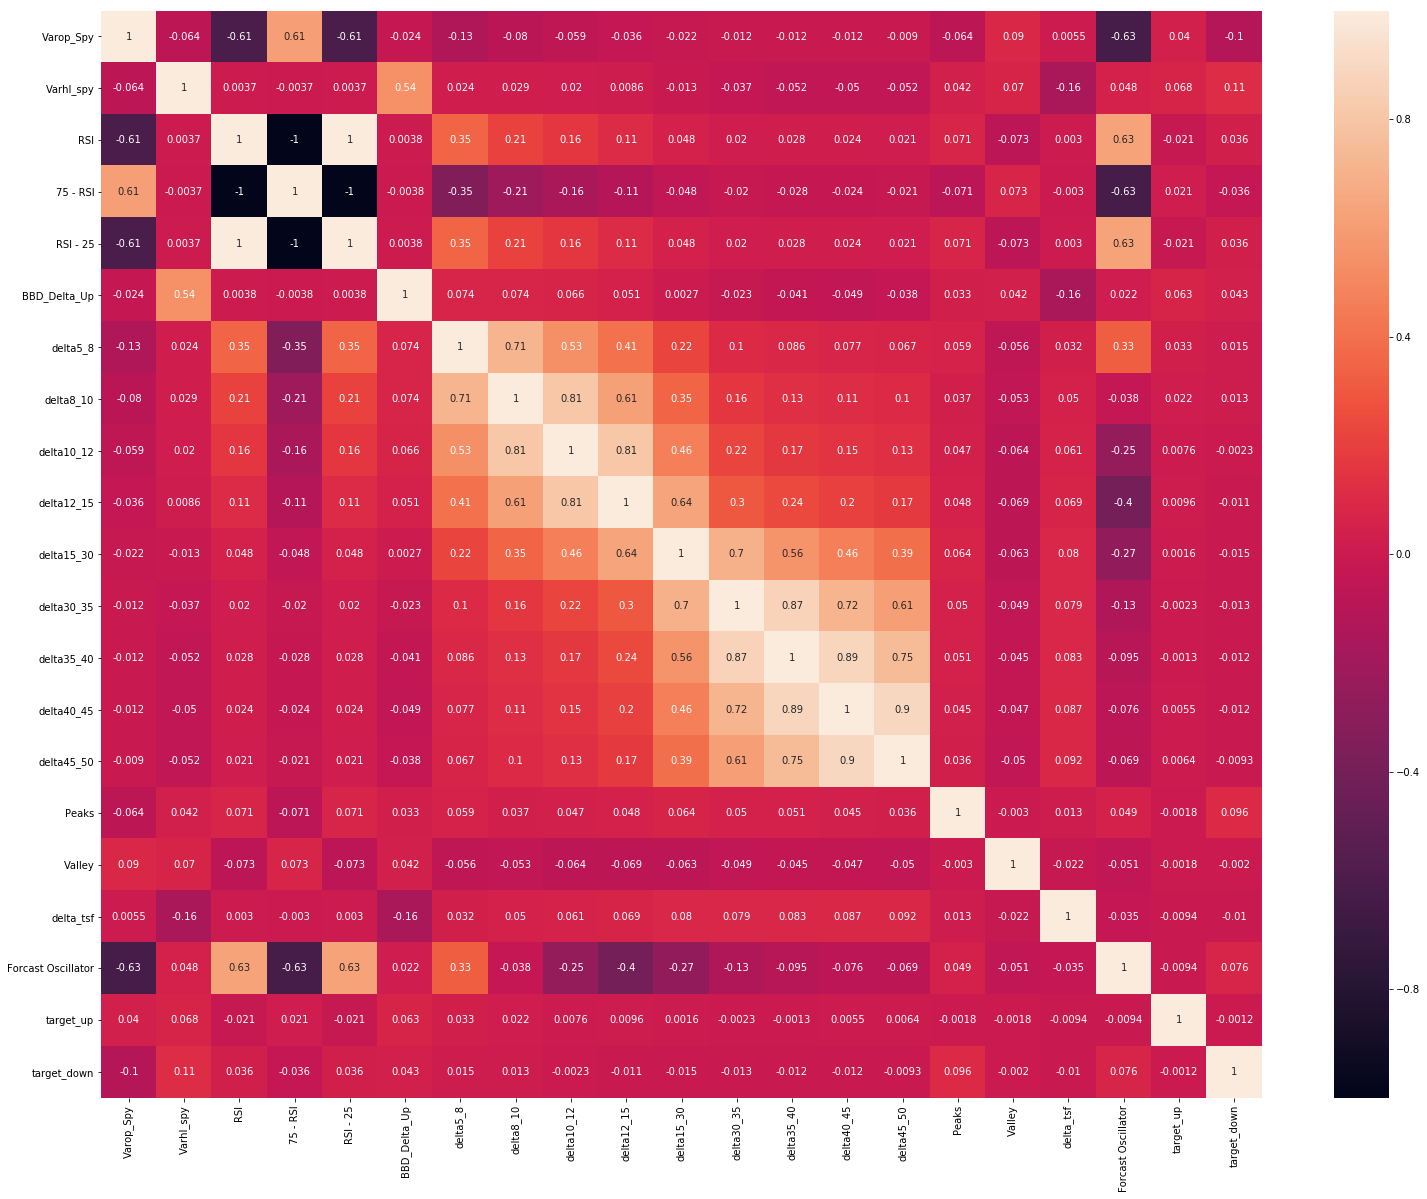

In [439]:
plt.figure(figsize=(26,20))
sns.heatmap(dataset_1D.iloc[:,:-1].corr(),annot=True)
plt.show()

In [440]:
dataset_1D.tail()

Date  Varop_Spy  Varhl_spy        RSI   75 - RSI  \
9995 2019-07-12 14:05:00        3.1        7.7  39.120418  40.879582   
9996 2019-07-12 14:10:00        6.3       14.1  16.185892  63.814108   
9997 2019-07-12 14:15:00        3.5        6.5   9.913071  70.086929   
9998 2019-07-12 14:20:00       -1.0        6.1  25.249784  54.750216   
9999 2019-07-12 14:25:00        0.1        6.9  25.249784  54.750216   

       RSI - 25  BBD_Delta_Up  delta5_8  delta8_10  delta10_12      ...       \
9995  19.120418      8.712925   -0.7925     0.3725    0.506667      ...        
9996  -3.814108     10.438154   -2.7475     0.3075    0.396667      ...        
9997 -10.086929     12.725128   -2.4875    -1.3425   -0.053333      ...        
9998   5.249784     10.881086   -2.5650    -1.6750   -0.125000      ...        
9999   5.249784     11.655466   -2.9575    -1.5125   -1.391667      ...        

      delta35_40  delta40_45  delta45_50  Peaks  Valley     delta_tsf  \
9995   -0.052143   -0.367222    0.232222      0       0  12340.486813   
9996    0.015714   -0.236667    0.166667      0       0  12337.708791   
9997    0.127500   -0.218611    0.065111      0       0  12334.412088   
9998    0.481786   -0.345278   -0.074222      0       0  12331.673626   
9999    0.792143   -0.192778   -0.340222      1       0  12328.953846   

      Forcast Oscillator  target_up  target_down  target_value  
9995           -0.038327          0            0       12337.3  
9996           -0.076935          0            0       12331.0  
9997           -0.082001          0            0       12327.6  
9998           -0.047955          0            0       12328.5  
9999           -0.025742          0            0       12328.5  

[5 rows x 23 columns]

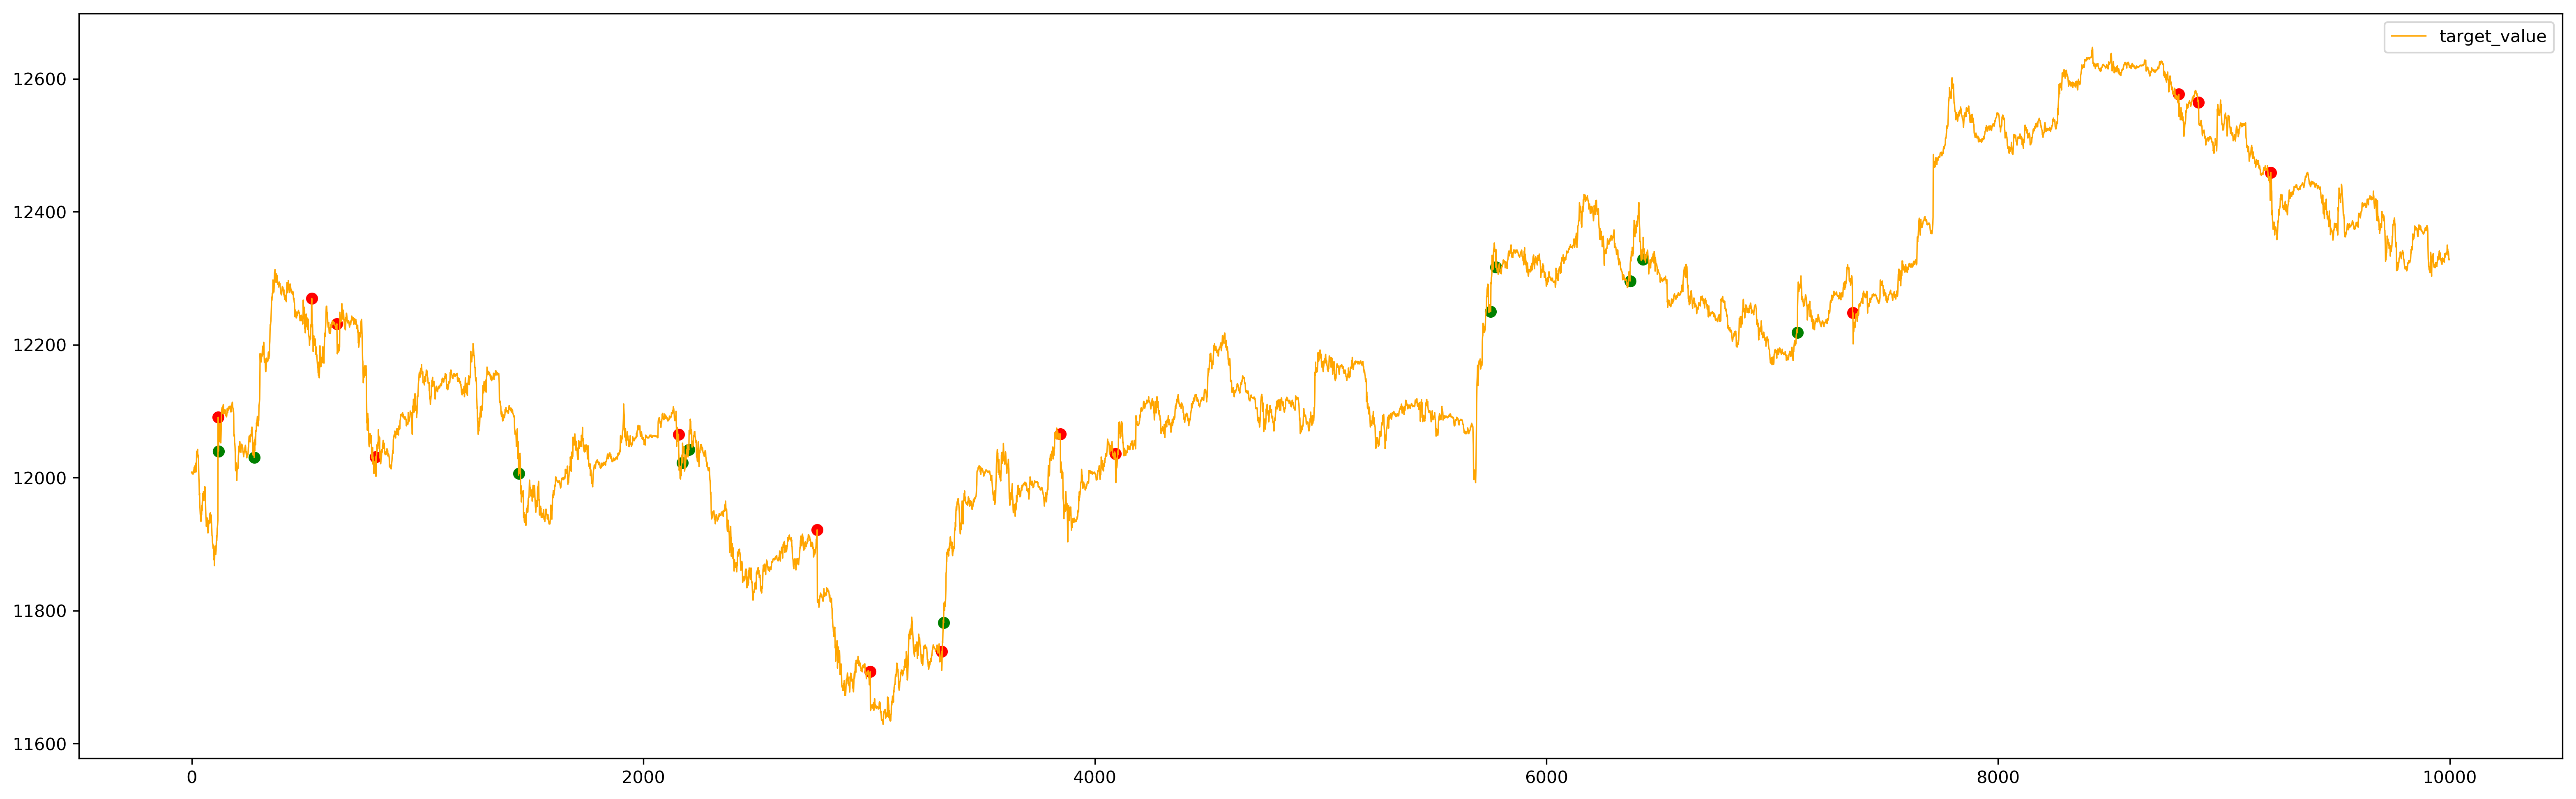

In [441]:
plt.figure(figsize=(26,8),dpi=300)
plt.plot(dataset_1D['target_value'],color='orange',lw=0.8)
for i in range(0,len(dataset_1D)):
    if dataset_1D.iloc[i,-3] == 1:
        plt.scatter(x=dataset_1D.index[i],y=dataset_1D.iloc[i,-1],c='g',marker='o')
    elif dataset_1D.iloc[i,-2] == 1:
        plt.scatter(x=dataset_1D.index[i],y=dataset_1D.iloc[i,-1],c='r',marker='o')
plt.legend()

In [442]:
dataset_1D.to_csv('data_prepared.csv')

In [443]:
dataset_1D.tail()

Date  Varop_Spy  Varhl_spy        RSI   75 - RSI  \
9995 2019-07-12 14:05:00        3.1        7.7  39.120418  40.879582   
9996 2019-07-12 14:10:00        6.3       14.1  16.185892  63.814108   
9997 2019-07-12 14:15:00        3.5        6.5   9.913071  70.086929   
9998 2019-07-12 14:20:00       -1.0        6.1  25.249784  54.750216   
9999 2019-07-12 14:25:00        0.1        6.9  25.249784  54.750216   

       RSI - 25  BBD_Delta_Up  delta5_8  delta8_10  delta10_12      ...       \
9995  19.120418      8.712925   -0.7925     0.3725    0.506667      ...        
9996  -3.814108     10.438154   -2.7475     0.3075    0.396667      ...        
9997 -10.086929     12.725128   -2.4875    -1.3425   -0.053333      ...        
9998   5.249784     10.881086   -2.5650    -1.6750   -0.125000      ...        
9999   5.249784     11.655466   -2.9575    -1.5125   -1.391667      ...        

      delta35_40  delta40_45  delta45_50  Peaks  Valley     delta_tsf  \
9995   -0.052143   -0.367222    0.232222      0       0  12340.486813   
9996    0.015714   -0.236667    0.166667      0       0  12337.708791   
9997    0.127500   -0.218611    0.065111      0       0  12334.412088   
9998    0.481786   -0.345278   -0.074222      0       0  12331.673626   
9999    0.792143   -0.192778   -0.340222      1       0  12328.953846   

      Forcast Oscillator  target_up  target_down  target_value  
9995           -0.038327          0            0       12337.3  
9996           -0.076935          0            0       12331.0  
9997           -0.082001          0            0       12327.6  
9998           -0.047955          0            0       12328.5  
9999           -0.025742          0            0       12328.5  

[5 rows x 23 columns]

In [444]:
float(talib.ATR(df['High'],df['Low'],df['Close'],timeperiod=14).tail(1))

8.421697952608529